In [1]:
#Gestion du système des fichiers
import os 
import os.path
import shutil
from glob import glob
import win32com.client as win32
from win32com.client import constants

from nltk.corpus import stopwords 
#Gestion des Dataset
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

#Gestion des caractères
import string
import re
import numpy as np

#conversion des documents pdf
import PIL.Image as pili
import pytesseract
from pdf2image import convert_from_path
from PIL import Image
import cv2

# Gestion des documents xlsx,docx
import docx2txt
import xlrd
import docx

#ML Classification
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score,classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn import feature_extraction
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_files
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.base import TransformerMixin
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline


#Nlp
import nltk  
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.classify.scikitlearn import SklearnClassifier

import spacy
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
from spacy import displacy

#serialisation
import pickle
import dill
import joblib

In [46]:
!pip install spacy
!python -m spacy download fr_core_news_md

[+] Download and installation successful
You can now load the package via spacy.load('fr_core_news_md')


In [53]:
conda install -c conda-forge spacy

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\surfaC\anaconda3

  added / updated specs:
    - spacy


The following packages will be downloaded:
Note: you may need to restart the kernel to use updated packages.

    package                    |            build
    ---------------------------|-----------------
    aiohttp-3.7.4              |   py38h294d835_0         596 KB  conda-forge
    async-timeout-3.0.1        |          py_1000          11 KB  conda-forge
    boto3-1.17.84              |     pyhd8ed1ab_0          70 KB  conda-forge
    botocore-1.20.84           |     pyhd8ed1ab_0         4.7 MB  conda-forge
    bz2file-0.98               |             py_0           9 KB  conda-forge
    ca-certificates-2020.12.5  |       h5b45459_0         173 KB  conda-forge
    cachetools-4.2.2           |     pyhd8ed1ab_0          12 KB  conda-forge
    catalogue-2.0.4            |   py38haa244fe_0          31 KB  conda-forge
    certifi-202

openssl-1.1.1k       | 5.7 MB    | ##4        |  24% 
openssl-1.1.1k       | 5.7 MB    | ##5        |  25% 
openssl-1.1.1k       | 5.7 MB    | ##5        |  26% 
openssl-1.1.1k       | 5.7 MB    | ##6        |  27% 
openssl-1.1.1k       | 5.7 MB    | ##7        |  27% 
openssl-1.1.1k       | 5.7 MB    | ##7        |  28% 
openssl-1.1.1k       | 5.7 MB    | ##8        |  28% 
openssl-1.1.1k       | 5.7 MB    | ##8        |  29% 
openssl-1.1.1k       | 5.7 MB    | ##9        |  30% 
openssl-1.1.1k       | 5.7 MB    | ###        |  30% 
openssl-1.1.1k       | 5.7 MB    | ###1       |  31% 
openssl-1.1.1k       | 5.7 MB    | ###1       |  32% 
openssl-1.1.1k       | 5.7 MB    | ###2       |  32% 
openssl-1.1.1k       | 5.7 MB    | ###2       |  33% 
openssl-1.1.1k       | 5.7 MB    | ###3       |  33% 
openssl-1.1.1k       | 5.7 MB    | ###3       |  34% 
openssl-1.1.1k       | 5.7 MB    | ###4       |  34% 
openssl-1.1.1k       | 5.7 MB    | ###4       |  35% 
openssl-1.1.1k       | 5.7 M

In [2]:
def save_as_docx(path):
    # Opening MS Word
    word = win32.gencache.EnsureDispatch('Word.Application')
    doc = word.Documents.Open(path)
    doc.Activate ()

    # Rename path with .docx
    new_file_abs = os.path.abspath(path)
    new_file_abs = re.sub(r'\.\w+$', '.docx', new_file_abs)

    # Save and Close
    word.ActiveDocument.SaveAs(
        new_file_abs, FileFormat=constants.wdFormatXMLDocument
    )
    doc.Close(False)

In [24]:
for dossier,sous_dossiers, fichiers in os.walk(r'F:\Sauv Surface 06092020\Données CV LM\CV LM\dataset\autre doc'):
    for fichier in fichiers:
        save_as_docx(os.path.join(dossier, fichier))

In [2]:
destination='F:\Sauv Surface 06092020\Données CV LM\CV LM'
for dossier,sous_dossiers, fichiers in os.walk(r'F:\Sauv Surface 06092020\Données CV LM\_10000'):
    for fichier in fichiers:
        print(os.path.basename(dossier))
        parname=os.path.basename(os.path.dirname(os.path.normpath(dossier)) )
        if os.path.basename(dossier)=="cv":
            print(fichier)
            
            
            nomfichier, ext = os.path.splitext(fichier)
            if nomfichier=="cv":
                shutil.copy(os.path.join(dossier, fichier),destination ) 
                newname='.'.join(fichier.split('.')[:-1])+"_"+parname+ext
                if not os.path.exists(os.path.join(destination, newname)):
                    os.rename(os.path.join(destination, fichier), os.path.join(destination, newname))
        if os.path.basename(dossier)=="lm":
                print(fichier)


                nomfichier, ext = os.path.splitext(fichier)
                if nomfichier.startswith("lm") or  nomfichier.startswith('LETTRE_DE_MOTIVATION') or  nomfichier.startswith('LettredeMotivation') or  nomfichier.startswith('Lettre_de_motivation') or  nomfichier.startswith('Lettre-de-motivation') or  nomfichier.startswith('Lettre-motivation') or  nomfichier.startswith('Lettre_motivation') or  nomfichier.startswith('LettreMotivation') or  nomfichier.startswith('lettremotivation') or  nomfichier.startswith('lettreMotivation') or  nomfichier.startswith('Lettre_Motivation') or  nomfichier.startswith('Lettremotivation')or nomfichier.startswith('LM'):
                    shutil.copy(os.path.join(dossier, fichier),destination ) 
                    newname="lm_"+parname+ext
                    if not os.path.exists(os.path.join(destination, newname)):
                        os.rename(os.path.join(destination, fichier), os.path.join(destination, newname))
   

cv
cv.pdf.swf
cv
CV_ROUASSI_HATIM_2__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
MounirDounasCV.Fr.05.2018__1___2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_IBTISSAM_ZINI__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_MERIEM__2.docx
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
curricTaha.boulajoul__4___3.pdf
lm
lettre_de_mot_commercial__2.odt
cv
cv.pdf
cv
Sara-BELATTAR-CV__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
oussama_20boumia_20Cv_20english__2.pdf
cv
CV_LAAYOUN_MED__1___2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_iham_mehdi__2.pdf
cv
cv.pdf.swf
cv
Cv_iham__2.pdf
cv
cv.pdf
lm
lettre_de_motivation__3.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV-ACHRAF_JEBBOUR__2.pdf
cv
Reda_Berrada_V2__2.docx
cv
cv.pdf
cv
cv.pdf.swf
cv
Maria_BEN_ABDOULWAHID_STAGE_2019__2.pdf
cv
cv.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_a_jour_fz__3___3.docx
lm
lettre_de_motivation__3___2.docx
cv
cv_idriss_belkhayat_2018_fr__2.docx
cv
cv.pdf
cv
CV-EL-KHOUNDAFI-Meryem-1__2.pdf
cv
cv.pdf
cv
cv.pdf
cv
20181005015843cvasmaahrimlapdf__2.pdf
cv
CV._HOUSNI-KAMAL_

cv
CV_CHARGE_DE_RECRUTEMENT_ET_DE_FORMATION__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV__CHARGE_DE__RECRUTEMENT_ET_DE_FORMATION__2.pdf
cv
CV_Marketing_Data_Analyst__3.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf
cv
CURICULUM_VITAE__2.pdf
cv
1541010188009_RB_CV2018__2.docx
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
hamzaa.benjelloun__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_YASSINI_ZOUHAIR__2.pdf
cv
20181101064358i.chatouane__2.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV__2.doc
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
20190724043311cvlamia_aaqiq__2.pdf
cv
CV_Lamia_AAQIQ__2.pdf
cv
El_Alaoui_Anas__2.doc
cv
El_Alaoui_AnasQ__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf
cv
Houcine_pd__2.pdf
cv
NV_cv_taghridy_2__2.docx
cv
cv.pdf
cv
CV_Siham_AHBALA__2.pdf
cv
CV_-siham_ahbala-__2.pdf
cv
cv.pdf
cv
siham_ahbala__2.pdf
cv
CV_HALIMA_OUADOUD_finall__2.pdf
cv
cv.pdf
cv
CV_BBO_2018__2.pdf
cv
cv.pdf
cv
cv.pdf
cv
Ghita_ERRINI_-_pour_fusion-1____ajour__2.docx
cv
cv.pdf.swf
cv
CV_NAJIB_PRE__2.pdf
cv
cv.pdf
cv
CV_HOUDA_BENMA

cv
CV_-_EL_QBIB_OUSSAMA__2.pdf
cv
cv.pdf.swf
cv
CV-EL_QBIB_OUSSAMA_BA__2.pdf
cv
cv.pdf
cv
CV_FR__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Ayoub_Akkioui___2.docx
cv
cv.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Salsabyl_Benabdellah__3.pdf
lm
LM_Salsabyl_Benabdellah__2.pdf
cv
cv.pdf
cv
CV_Yassine_DALIMI__2.pdf
lm
Lettre_Motivation_-__3.docx
cv
CV_.__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
lm
Lettre_de_motivation___4.pdf
cv
Zarkil_Adil_Cv__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
lm
Zarkil_Adil_l_lettre_de_motivation__3.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_KHALID_BAHI__3.pdf
lm
LETTRE_DE_MOTIVATION__2.pdf
cv
cv.pdf
cv
laaroussi_basma__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
Abdelkarim-BOUHLAL-CV-2017__2.pdf
cv
cv.pdf
cv
CV__ALI_BOUKARROU_RECENT1__2.docx
cv
cv.pdf
lm
CHARGE_DE_CLIENTELE_PRIVE_banque__3.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_RAKOUT_Imane__2.pdf
cv
cv_Aziz-1__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
cv_Aziz-Med__2.docx
cv
hicham-cv__2.pdf
cv
cv.pdf
cv
cv.pdf
cv
CV_ALAOUI_CHRIFI_BRAHIM__2.doc
cv
cv.pdf.swf
cv
cv.pdf
cv


cv
CV_TALIB_Imane_2018_1__2.pdf
lm
lettre_de_motivation_TALIB_Imane_2018_1__3.pdf
cv
CV_AYMAZ_Rabie_PM__1___2.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
RABIE_AYMAZ_CV_FR__2.pdf
cv
monCV__4___2.pdf
cv
cv.pdf.swf
cv
CV_MARKETING_Afafe_EL_OUALI__2.pdf
cv
cv.pdf
cv
CV_CHAIMAE_EL__2.docx
cv
cv.pdf
cv
cv.pdf
cv
CVKEB2018VS__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
CV_Nisrine_YOUBI_sept_2018__2.pdf
cv
CV_Nisrine_YOUBI_juin_2018__2.pdf
cv
cv.pdf
cv
CV-RACHIDA-KHALKI__2.pdf
cv
cv.pdf
cv
Ayoub_Elkhallioui_EMI_MIS__2.pdf
cv
cv.pdf.swf
cv
CV_Ayoub_El_khallioui__2.pdf
cv
cv.pdf
cv
CV_Hajar_KCIM__3.pdf
cv
cv.pdf
lm
lettre_de_motivation__2.pdf
cv
cv_final_20181__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
Bentaleb_Chadi_FR__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
Mohammed_MOUNIR___2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
EL_GUERDA_Anouar__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Kantaoui__2.doc
cv
CVBENALInouveau_1___2.pdf
cv
cv.pdf
cv
salma_LAKOUTI__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
Cv._ouakrim_

cv
BOUCHRA_LKABOUS__3___2.pdf
cv
Bouchra_LKABOUS_2018__2.pdf
cv
cv.pdf
cv
Cv_sara__2.docx
cv
cv__1___2.doc
cv
cv.pdf
cv
rach_magas__2.docx
cv
cv.pdf.swf
cv
CV_MERIEM_KAYA_2018__2.pdf
cv
cv.pdf
cv
CV_Soukaina__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_-Amine_Ezzaidi-___2.pdf
cv
CV_-Amine_Ezzaidi-__2.2.pdf
cv
CV_kaoutar_massour__2.pdf
cv
cv.pdf
cv
cv.pdf
cv
lahcen_tougui_cv_2018__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
lahcen-tougui-cv-2018__2.pdf
cv
CV-saida-eghchi2018__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
BAMORO_Soiliou_-_CV__2.pdf
cv
cv.pdf
cv
CV_MED-1__2.docx
cv
cv.pdf
cv
1526617031871_CVLarbiAzerhouni__2.docx
cv
cv.pdf
cv
CHAIMAE_BAHRAOUI_CV__1___2.pdf
cv
chayma_cv___2.pdf
cv
cv.pdf
cv
CV_Habachi__2.pdf
cv
cv.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
Reda_CV_Master_ENCG__2.doc
cv
Reda_CV_Master_ENCG__3.pdf
lm
LM_salafin__2.pdf
cv
cv.pdf
cv
Youness_ATID__2.pdf
cv
CV_TAYRI_MERYEM_-_Copie__2.docx
cv
cv.pdf.swf
cv
CV_TAYRI_MERYEM__2.docx
cv
cv.pdf
lm
Lettre_de_motivation__1___3.d

cv
CV_KAWTAR_MASSANI_18072018__2.pdf
cv
CV_BF__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
CV_DEVELOPPEMENT__2.doc
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_ZAHRA_ZIDANI_new-1__2.pdf
cv
CV_ZAHRA_ZIDANI_modifie__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv_new_jouhri_said__2.pdf
cv
cv_jadid__2.pdf
cv
cv.pdf
cv
CV_HADA__2.doc
cv
cv.pdf
cv
Mustafa-El-Ghatous__1___1___1___1___2.docx
cv
cv.pdf
cv
cv_zahra__2.docx
cv
AKD-CV__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV__Elmaimani_Mohamed__2.pdf
cv
downloadfile-39__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
hm-nv__2.docx
cv
cv.pdf
cv
cv.pdf
cv
CV_SAJID_OMAR__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv_ilham_semlali__2.docx
cv
CV.S__2.pdf
cv
CV.S__1___2.pdf
cv
CV.S__2.docx
cv
cv.pdf
lm
Lettre_de_Motivation_salafin__3.docx
lm
Lettre_de_Motivation__3.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
cv_RIHANA_20212__2.pdf
cv
CV_SEDRATY_MEHDI__3.pdf
cv
cv.pdf
lm
Lettre_de_motivation__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
Mon_Nouveau_CV__2.docx
cv
20181121032125cv2019-converted_

cv
cv_narjis__2.pdf
cv
cv__3.pdf
cv
cv.pdf
lm
lettre_de_motivation__2.docx
cv
cv_madiha_fajri_phone__1___2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
20180925095844cvkawtarlamrhari_1__1___2.doc
cv
CV_LP_K__2.rtf
cv
cv.pdf
cv
CV_Kawtar_lamrhari__2.doc
lm
lmk__3.docx
cv
CV_AHMED_ZEMZAMI___2.pdf
cv
cv.pdf
cv
cv.pdf
cv
CV_Normalise__ERROCHDI_Hicham__3.pdf
lm
Lettre_de_motivation_Hicham_ERROCHDI__2.doc
cv
CV_MUSTAPHAELA_1__2.doc
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Sara_ZBIR__2.2.pdf
cv
CV_7__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Noura_BENACHOUR__1___2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
My_CV_II__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
FR_CV_Sihame-ES-SAOUDY__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
Assistante_de_direction_en_He_bergement__2___2.pdf
cv
CV_Houda_Rabat__2.pdf
cv
CV_Houda_Casablanca_s__2.pdf
cv
cv.pdf
cv
CV_Houda1__2.pdf
cv
CV_Houda_Casablanca_a__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
CV__2.docx
cv
cv.pdf
cv
cv.pdf
cv
ouachbab__2.docx
lm
letre_de_motivation__3.doc


cv
cv.pdf
cv
CV-widad__2.docx
cv
C.V__2.pdf
cv
cv.pdf.swf
cv
C.V__2.doc
cv
cv.pdf
cv
20181219032845cv3__2.pdf
cv
cv.pdf
cv
CV_Najoua_BOULLI__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
DOC_1_-_CV_ILYASS_MGHARI__2.pdf
cv
CV_Sara_EL__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf
cv
cv_badr_zahir_FRRRR_001-2__2.doc
cv
WISAM-CV_2018__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
WISAM-CV_2019__2.docx
cv
DRISSI_Chouaib1991__2.docx
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV__2.pdf
lm
LettreMotivation__3.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Soufiane_Berjamy_03-09-2018__2.pdf
cv
CV_NAOUAL_HAFID__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV-Naoual-HAFID__2.pdf
lm
lettre_de_motivation_NAOUAL_HAFID__3.pdf
cv
20190828120555cvversionfr_1___2.docx
cv
cv-__2.pdf
cv
HOUDA_SABBAR__1___2.docx
cv
cv_version_fr__1___2___2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Wahib__2.pdf
cv
cv.pdf
cv
CV-2019-2__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_2018__2.pdf
cv
cv.pdf.swf
cv
cv_khadija__2.doc
cv
cv.pdf
cv
cv__2.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
AALAH_Laila___CV__2.pdf
cv

cv
Resume__Jehane_LERALLA___Responsable_QHSE-RSE_et_certifie_e_auditrice_IRCA_ISO_9001v2015__2.pdf
cv
Resume__Jehane_LERALLA_-_Inge_nieur_Responsable_QHSE-RSE_-_IRCA_Lead_Auditor_ISO_9001_vs_2015__2.pdf
cv
CV_Jehane_LERALLA___Responsable_QHSE-RSE__Inge_nieur_Ame_lioration_Continue__2.pdf
cv
cv.pdf
cv
Zakia_OUBOU_CV__3.pdf
lm
Lettre_de_motivation__2.pdf
cv
20190825100935cvsalamounimohammed__2.pdf
cv
20170913111439cvsalamounimohammed__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
20190225112043salamounimohammed__2.pdf
cv
20180914102423cvsalamounimohammed__2.pdf
cv
cv.pdf
cv
SAHIBEDDINE_Sara2019__2.pdf
cv
mon_cv__2.docx
cv
cv.pdf
cv
Cv_doc_2__2.docx
cv
cv_2019__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
20181217094729cvlahcenelkharroubi__2.pdf
cv
cv.pdf
cv
Lahcen_EL_KHARROUBI_CV__2.pdf
lm
20181219031251lettredemotiavtionelkharroubilahcen__3.pdf
cv
CV_Chaimae_SHISAH__2.pdf
cv
cv.pdf
cv
0_56320__2.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
LATIFI_JIHANE__2.docx
cv
CV_Adnane__2.pdf
cv
cv.

cv
CV_-_Ahmed_BEKKALI__2.pdf
cv
CV_Ahmed_BEKKALI_-_v5_-_Jan2020__2.pdf
cv
cvsafae_benabbou__2.pdf
cv
cv.pdf
cv
MARZAK_HIND_-_CURRICULUM_VITAE__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
1536255720831_CV__2.pdf
cv
cv.pdf
cv
cv.pdf
cv
fatiha20__2.pdf
cv
cv.pdf.swf
cv
CV_Mme_Hind_SOULAMI___2.pdf
cv
cv.pdf
cv
CV_Imane_BENAHMIDA__2.docx
cv
cv.pdf
cv
CV_Imane_BENAHMIDA____4___2.docx
lm
lettre_de_motivation__3.doc
cv
Riyaz_Khan__2.docx
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV-CV-19__2.docx
cv
cv.pdf
cv
cv.pdf
cv
CV_Elayachi_SMOUNI1__2.pdf
cv
Kamali_Meriem_CV__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
1528979694682_Amine_SAAD_CV__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
Controleur_de_gestion_Jalila_BMSRF__1___2.pdf
cv
Auditeur_Interne_Cv_Jalila_BMSRF__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
Controleur_de_gestion_Cv_Jalila_BMSRF__2.pdf
cv
Controleur_de_gestion_Cv_Jalila_BMSRF.__2.pdf
cv
CV-ahamada-abdoul-anziz_5__2.pdf
cv
CV-ahamada-abdoul-anziz__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv_dalall_2__2.doc
cv
cv.p

cv
cv.pdf.swf
cv
CV_DAANOUNI_FADWA__2.pdf
cv
cv.pdf
cv
Daanouni_Fadwa_CV__2.pdf
cv
Cv_Fadwa_DAANOUNI__2.pdf
cv
CV__2.doc
cv
cv.pdf
cv
20180905124924cvachraffin_1___2.doc
cv
20190110050644cvachraf__2.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
Achraf_LAACHIR_CV__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
335872__2.doc
cv
RIHAME_JEBRANE_CV__2.pdf
cv
CV_RIHAME_JEBRANE__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
lm
lettre_de_motivation__3.docx
cv
cv.pdf
cv
cv.pdf
cv
cv_ghizlane___modifier___2.pdf
cv
CV_IHAB_FAWZI_-_IGI__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
RESUME_IHAB_FAWZI-_MSI__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
CV__2.pdf
cv
cv__1___2.docx
cv
cv.pdf
cv
cv_mir_hanaa__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
Bulletin_d_inscription__2.docx
cv
cv.pdf
cv
20181211074028cv4__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
lm
20181211074028lettre-de-motivation-4__3.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
AC-cv21__2.pdf
cv
mon_cv_1__2.pdf
cv
cv.pdf
cv
CV_Meryem_Douelfiqar_1__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Amina_EL_HOUSNI__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_2018__2

cv
CV_EL_MADEKOURI_RAJA__2.pdf
cv
cv.pdf
lm
LETTRE_DE_MOTIVATION__3.doc
cv
cv.pdf.swf
cv
CV_REDA_BEN_SOULTANE__2.pdf
cv
cv.pdf
cv
cv.pdf
cv
Cv_khaoula__2.pdf
cv
CV_MERIEM_KERRAD_2018__2.pdf
cv
cv.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
Ahmed_ait_ayane_cv__2018___2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
attachment_1_mehdi_cv__2.docx
cv
CV_TARIK_MACHAAR_maj_04.2018__2.doc
cv
CV_TARIK_MACHAAR_-_AMOA_032020__2.doc
cv
CV_TARIK_MACHAAR_-_CP_AMOA_032020__2.doc
cv
CV_TARIK_MACHAAR_-_Consultant_042020__2.doc
cv
CV_TARIK_MACHAAR_-_CP_AMOA_042020__2.doc
cv
CV_TARIK_MACHAAR_-_CP_122020__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_TARIK_MACHAAR_-_CP_AMOA_072020__2.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
cv_TABIT_-_2__2.docx
cv
cv.pdf.swf
cv
Rachida_OMARI_s__CV_-_LV__1___2.pdf
cv
cv.pdf
cv
cv_asbahi_1-1-1__2.docx
cv
cv.pdf
cv
cv.pdf
cv
cv_abderahim_final__2.doc
cv
20180905031315cvz.ibtissam__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
20181205050437cvibtissamzati__2.pdf
lm
20181205050437lettredemotivation-ibtissamzati__3.pd

cv
Curriculum_Vitae__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
20190823084955cvafifimane__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
AFIF_IMANE_cv_pddf__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv-fatmazahra-bouzid__2.pdf
cv
cv.pdf
cv
CV_05-2017__2.doc
cv
Curriculum_Vitae__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV__2.pdf
cv
cv.pdf.swf
cv
cv_zineb_charifi_-_Copie__2.docx
cv
cv.pdf
cv
Curriculum_Vitae__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf
cv
cv_abdeljalil__2.pdf
cv
cv.pdf.swf
cv
CV_HassnaNADIFI__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
Cvouafae_brouzi_real__2.pdf
cv
cv.pdf
cv
cv_cr__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV-Amrani__3___2___2.pdf
lm
lettre_de_motivation_hajar__1___1___3.rtf
cv
cv.pdf.swf
cv
CV__RAKIB_EL_MAHDI_version__2.pdf
cv
CV_actualis___CA__2.pdf
cv
cv.pdf
cv
CV__RAKIB_EL_MAHDI__OFFICIEL_fbs_3__2.pdf
cv
CV__RAKIB_EL_MAHDI__OFFICIEL_Modifier__2.pdf
cv
arsalan_isma_ilfff1111111f__1___2.pdf
cv
cv.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
CV_Loughziel_Sanaa__2.pdf
cv
cv.pdf
cv
cv_youssef_actualise___2.pdf
cv
cv.pdf


cv
cv.pdf.swf
cv
cv.pdf
cv
MARIEM_BOUABDELLAOUI__2.pdf
cv
cv.pdf
cv
Mlle_HOUDA_SALEM___3___2.docx
cv
cv.pdf
cv
20180910124133c.vimane_lhadi__2.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
c.v_IMANE_LHADI_actualis__01__1___2.doc
cv
20191201115232c.vimane_lhadiactualise_01__2.doc
lm
20180910124133lettredemotivation__3.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
KAROUANI_OMAR_2018__2.pdf
cv
cv-mohcine-1__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
brahim_cv__2.doc
cv
cv.pdf
cv
CV_-Mohamed_Lamkhayar__ENSIAS__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
20190629101658cvaboulazimane1_3___2.pdf
cv
cv_aboulaz_imane.doc_02__1___2.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
O_ERRACHKI_cv__2.pdf
cv
cv.pdf
cv
20181224014241cvsoukaina__2.doc
cv
CV_JEBARI_Karim_VERSION_6__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
HAJLAOUI_2017__2.docx
cv
HAJLAOUI_2018__2.docx
cv
cv.pdf
cv
CV_KHADIJA__2.pdf
cv
cv.pdf
cv
20180924033637m.atif__2.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
cv__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
kaoutar_cv_nouveau__2.pdf
cv
Kaoutar_MAANA

cv
20190425104236newmediacompanymostoutstandingsocial__2.pdf
cv
20180914020649cv-jouharikamar__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
20181009054125cv-jouharikamar__2.pdf
cv
MOHAMMED_AMINE_HACHANI__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_BELFQIH_Chaimaa__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_BELFQIH_CHAIMAA__2.doc
cv
20180906105433cvm__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
lm
20180906105433lettre_de_motivation__3.pdf
cv
cv-2__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
0_SAMIR_1111111__2.docx
cv
cv_fati11__2.docx
cv
cv.pdf
cv
inbound2175334773849558211__2.pdf
cv
cv_2018__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
inbound890953567861080261__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
20181219015415cvkenza__2.doc
cv
20181224014535cv_misa_jour__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Abdelaziz_KAMEL_19__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Abdelaziz_KAMEL_19.1__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_ISMAIL_AZOUGARH_FR__3.pdf
lm
LETTRE_DE_MOTIVATION_ISMAIL_AZOUGARH__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
20190320115046c

cv
maryam_cv__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
CV_INGENIEUR_D_AFFAIRES__2.pdf
cv
cv.pdf
cv
Abdelrhman_CV_ME.__2.pdf
cv
cv.pdf
cv
cv.pdf
cv
ZOUAOUI_MYRIAM_cv_franc_ais_NEWWW__2.pdf
cv
cv.pdf
cv
cv_classique_colorC3A9__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_classique_colore___2.docx
cv
CV-_Lamiaa_MACHKOUR__2.pdf
cv
cv.pdf
lm
Lettre_de_motivation-_Lamiaa_MACHKOUR__3.docx
cv
cv_BEN_ZEMOURI_Rabab__2.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
20180914125238cvsarramalhi__2.doc
cv
CV_Malhi_SARRA123__2.docx
cv
CV_Malhi_SARRA_fin__2.pdf
cv
cv.pdf.swf
cv
20190206081918cvmalhisarra-converted_4___2.pdf
cv
cv.pdf
cv
20181001023341cvsarramalhi__2.pdf
lm
20180914125238lettredemotivation___3.docx
lm
20181001023341lettredemotivation___3.docx
cv
cv_VBENHSAINE_RIM__2.pdf
cv
nv_cv_rim-converti__2.pdf
cv
Rim_BEN__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv_benhsaine_rim__2.pdf
cv
cv_mahdi_khattabi___2.pdf
cv
cv.pdf
cv
Cv_cr_dit_Management__2.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_OUMA__2.docx
cv
cv.pdf
lm
LETTRE_DE_MOTI

cv
Cv_Younes_KHAMLACH__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
Chaimae_REMIDI_CV__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
meriem-joti-cv-__2.pdf
cv
cv.pdf
cv
meriem-joti-cv__2.pdf
cv
Cv_ABDELLAH_AFI__2.pdf
cv
cv.pdf
cv
CV_Pro__3.pdf
cv
cv.pdf.swf
cv
cv.pdf
lm
LM_SALAFIN__2.pdf
cv
De_mission_AR_-SABRNE_CHABBOUTI__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
Cv_hamdouchi__2.pdf
cv
Cv_hamdouchii__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv_m__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
CV_WISSAL_LAMAI__2.pdf
cv
cv.pdf
cv
CV_WISSAL_LAMAI_MRH__2.pdf
cv
CV-C-_KABBAGE_Abdallah__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_OUKHABO_chaima__2.pdf
cv
cv_fati__1___2___2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf
cv
CV._Younes_Benchekroun__2.doc
cv
Meriem_OUAFI_CV_2019__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
Merieme_OUAFI_CV__4.pdf
cv
1523283327296_Meriem_OUAFI_CV2__2.docx
cv
CV-SMAHI_Yassamine__2.pdf
cv
cv.pdf
cv
cv.pdf
cv
CV_Khalid_ELManfalouti__3.docx
cv
cv.pdf.swf
cv
CV_-_Khalid_EL_M

cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf
cv
kawtar_bilad__2.pdf
cv
cv.pdf
cv
cv_franc_ais__3___2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_FINAL__2.pdf
cv
CV_Hikmat_soukaina__2.pdf
cv
cv.pdf
cv
naguir_mohamed2-1__2.docx
cv
CHOUKRI-Somia-1__2.docx
cv
CHOUKRI-Somia-1__1___2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
20181101010510cv.elassri__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
HELASSRI_CV__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
1528461969167_CV_-_Chaimaa_RAYK__2.docx
cv
NEW_CV_KAWTAR__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV.Fadwa___2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv_zineb_nv__2.docx
lm
lettre_de_motivation__3.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.BELLAMINEFZ__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
Hamza_CHAHBANE_-_CV__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV__2.pdf
cv
Sara_CV__2.docx
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
Bouziani_Hind__2.docx
cv
cv_professionnel_saad__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Elhalloumi_3___3.pdf
lm
lettre_de_motvation__2.docx
cv
cv.pdf.swf

cv
TAHIR_Zakariae_CDP_2018__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
Curriculum_Vitae__2.docx
cv
cv.pdf
cv
CV_Hajar_HAMOUCHE-1__2.pdf
cv
cv.pdf
cv
cv_francais_new__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
CV_el_farisy_hafsaa__2.pdf
cv
cv.pdf
cv
cv_hafsaa_el_farisy__3.pdf
lm
Lettre-de-motivation_HAFSAA_EL_FARISY__2.doc
cv
laqlalech_mamoun_CV__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
Mon_CV_Sara__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_LAMGHABBAR_MERYEM_v019-converti__1___2.pdf
cv
CV_LAMGHABBAR_MERYEM__2.docx
cv
cv-10.2__3___1___2.pdf
cv
cv.pdf
cv
cv.pdf
cv
CV-BENAISSA-SAID__2.pdf
cv
cv.pdf
cv
CV__2.pdf
cv
cv.pdf.swf
cv
cv.doc
cv
cv.pdf
cv
DOC-20181001-WA0020__2.docx
cv
cv.pdf
cv
cv_chaimaa_chahid__2.pdf
cv
cv_salah_edine_comerce__2.docx
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV__2.pdf
cv
20200203060634cvabouhourairadr_compressed__2.pdf
cv
cv.pdf.swf
cv
cv_hamza_org__1___2.pdf
cv
cv.pdf
cv
cv_Hamza_der1-converted__2.pdf
cv
cv.pdf.swf
cv
20190703103622cv_20ouma_202019__2.pdf
cv
cv.pdf
cv
2018

cv
CV_Alae_Ghenname__2.pdf
cv
CV_Semlali_Said_2017__2.docx
cv
cv.pdf
cv
cv.pdf
cv
CV__2.pdf
cv
20181219021145isolation__2.docx
cv
cv.pdf.swf
cv
20181219022337isolation__2.docx
cv
cv.pdf
cv
20190425010243recouvrement__2.docx
cv
cv.pdf.swf
cv
20180914025109cv_r18__2.pdf
cv
cv.pdf
cv
CV_-EL_FAKIR_Med_Zakaria__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_othman_fassi_fihri_actualis___2.pdf
cv
CV_Othman_Linkedin__2.pdf
cv
CV_Othman_Fassi_Fihri__2.pdf
cv
20181221084033moussa-ndiaye-cv__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv-moderne_WORD-converted__1___2.pdf
cv
nouveauWord__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_S.N__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
20181202080653cvhasnaa_anachad__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
oubani_hassan_CV__2.doc
cv
CV_NASSIRI_NISRINE__2.pdf
cv
CV_Nisrine__2.pdf
cv
cv.pdf.swf
cv
20190619094956cvnassirinisrine__2.pdf
cv
cv.pdf
cv
CV_Nisrine_NASSIRI___2.pdf
cv
CV_Nisrine_NASSIRI__2.pdf
cv
cv.pdf.swf
cv
K

cv
cv_new_GB-converted__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
Youssef_s_Resume__5___2.pdf
lm
LM__3.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
cv_youssra__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv_yasmine___2.docx
cv
CV_YASMINA_AATRIS__2.pdf
lm
Partager_lettre_de_motivation_YASMINA_aatris__3.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv_final_ahlam__2.pdf
cv
cv.pdf
cv
CV_RANYA__2.pdf
cv
CV_WID__2.pdf
cv
0_CV-Widad__28.05.19___2.pdf
cv
cv.pdf.swf
cv
CV_WIDAD_2017___2.doc
cv
cv.pdf
cv
Ayoub_Boudrar__2.pdf
cv
cv.pdf
cv
CV-douae__2.docx
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
1537894425893_CV__4___1___3.docx
cv
cv__2.pdf
cv
cv.pdf
cv
CV_HABARMAN_FATIMA__2.docx
cv
20190804051348cvhabarmanfatima__2.pdf
cv
CV_HABARMAN_FATIMA__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
lm
Lettre_de_Motivation_HABARMAN_FATIMA___3.doc
cv
cv_2019_2020_1___2.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
hajar_BOUNAGUI_-_version_4_PDF__2.pdf
cv
cv.pdf
cv
samiha_cv2018__2.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
20190715010328samihacv2019__2.doc
cv
20190823065937samih

cv
cv_imane__2.docx
cv
cv.pdf
cv
OuaouichaMehdi-CV__1___2.pdf
cv
cv.pdf
cv
CV_SaraMoussaid__2.pdf
lm
LETTRE_DE_MOTIVATON__3.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CVmeryem.chargC3A9e_RH__2.pdf
cv
YACOUR__Naoufal_cv__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_NAOUFALYACOUR_29912020__2.docx
cv
20190429042626hananeanzedecv__2.pdf
cv
20180923101804hanane-anzede-cv__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
lm
20180923101804lettre_de_motivation_1___3.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
Amine_KHARRAZ_CV___Poste__Nationale_Universite__Plytechnique__Lviv__2.pdf
cv
ABDELFETTAH.CHABAR022018-2__3.pdf
cv
cv.pdf.swf
cv
20190522124402abdelfettah.chabar2019ph__2.pdf
cv
cv.pdf
cv
ABDELFETTAH.CHABAR2020__2.pdf
lm
LM201804__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
Ghizlane_SAFSAF_cv_fr__2.pdf
cv
CV_YOUSRA_BENDRISS__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
PROFIL_COMMERCIALE-ilovepdf-compressed__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv_charge__cre_dits_relations_bancaires_C__2.pdf
cv
CV__2.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
SOUHAILA_BENMIRA__2.doc
cv
cv.pdf

cv
SABAH_OUTLIOUA_CV__2.docx
cv
cv.pdf
cv
cv_hamza_benkhaled_prof__2.pdf
cv
CV_Hamza_Benkhaled__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf
cv
CV_Mohcine__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
1542894746419_CV_HALIMA2__2.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
CV-HOUDA__2.pdf
cv
20181221014136cvait-aqaridhouda__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV-Taghti_Jihad__1___2___2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV__GHISLAINE_BELEMSAGHA__2.pdf
cv
CV_Bassma-1__2.docx
cv
cv.pdf
cv
CV_HAFIDA__2.pdf
cv
cv.pdf
cv
cv-amina-oufras__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
C.V._HIBA_LOUBANI_RH_VF__2.pdf
cv
cv.pdf
cv
cv.pdf
cv
Cv-Zakaria_bairat__1___2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
AHDOUCHE__LARBI__2.docx
cv
med__1___2.pdf
cv
cv.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_IMANE_MOUTTAKI__2.pdf
cv
CV__CHARAF_Nakhili__2.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
cv_sr__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf
cv
CV_EL_BOURI_Ing_Proc__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
sally__2.pdf
cv
cv.pdf.swf
cv
el-harrak-cv__2.pdf
cv
cv.pdf
cv
cv.pd

cv
CV_YOUNESS_SABRI_COMMERCIAL__2.pdf
cv
cv-ELBAGHAZAOUI__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_EL_MOUDNI_MAROUA_2018__2.pdf
cv
cv.pdf.swf
cv
EL_MOUDNI_MAROUA_CV_2018__2.pdf
cv
cv.pdf
cv
cv.pdf
cv
cv11-edc-converted__2.pdf
cv
cv_Yassinee__2.docx
cv
cv_Yassinee__2.pdf
cv
cv.pdf
lm
lettre_moti_d__3.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
lamia_CV__2.docx
lm
lettre_de_motivation_de_charge___de_cliente_le___3.doc
cv
cv__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_FR__2.pdf
cv
1534674639953_MAHA.BERREM.CV_francais__2.doc
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Amine_EL_OTMANI_dev__2.pdf
cv
DOC-20180806-WA0000__2.doc
cv
cv.pdf
cv
116_cv_new_1___2.pdf
cv
cv.pdf
cv
ARROB_CV__3.pdf
cv
cv.pdf.swf
cv
cv.pdf
lm
lettre_de_motivation_poste_auditeur__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_SOUKRAT_AYOUB__2.pdf
cv
cv.pdf.swf
cv
CV-Soufiane_DIOURI__2.pdf
cv
cv.pdf
cv
pdf__2.pdf
cv
cv.pdf
cv
Mon_CV__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
CV_Kenza_CHOUAY__2.pdf
cv
cv.pdf
cv
CV_samir_sajid_87ed6e1e__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv


cv
CV_SARA_2018__2.pdf
cv
BERRADA_Youssra__2.docx
cv
cv.pdf
lm
Lettre_de_motivation__3.doc
cv
CV-Youssef_ERTEL_final__2.docx
cv
cv.pdf
cv
Ilham_Asserrar_CV__2.pdf
cv
cv.pdf
cv
Ilham_Asserrar_CV_CC__2.pdf
cv
cv__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_LAABAR_IMANE__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv_tafahi_alae-eddinem__2.pdf
cv
cv.pdf
cv
mon_cv_3__3___2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
Samira_salhi_cv_1___2.pdf
cv
cv.pdf
cv
CV_SOUKAINA_actif__2.docx
cv
CV_DOHMI__2.pdf
cv
cv.pdf
cv
cv.pdf
cv
CV_3___2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_SARA_LAARED.__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
20180920110522cv-elguerrab-wejdanepdf__2.pdf
lm
20180920110522lettredemotivationrecrute__3.docx
cv
CV_Alaa_Eddine_Raissi__2.pdf
cv
cv.pdf
cv
Curriculum_Vitae_-_Wiame_Elkaous__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
ALAOUI_ISMAIL__1___3.pdf
lm
LM_Auditeur_interne___2.docx
cv
BOUSHAF_ZINEB__2.doc
cv
cv.pdf
cv
HICHAM_CV__2.doc
cv
cv.pdf
cv
CV_KHINIT_lahcen__2.pdf
cv
cv.pdf
cv
CV-AWA-SOUMAH__2.pdf
cv
c

cv
M572400_-_copie__1.docx
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Ayoub_IDRISSI_AZZOUZI__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Morad_2016_2___2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
GUALI_Zineb_Curriculum_Vitae__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
20180912013345cvimanesakouri__2.pdf
lm
20180803114051demandedemplois__3.pdf
cv
20180906095521cvasmaamoussaif2018__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
lm
20180906095521lettredemotivation-amaamoussaif2018__3.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
0_meriem_massano_cv__2018-converted__2.pdf
cv
cv.pdf
cv
Hafsa_Rguib_Resume_AP__1___2.doc
cv
cv.pdf
cv
cv.pdf
cv
cv.pdf
cv
Doha_HSAOUI_CV__3.pdf
lm
Lettre_de_motivation_HSAOUI_DOHA__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_mekki_benabdeljlil_French_version__2.pdf
cv
bac_plus_5__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Narjiss_OUDERNI__2.pdf
cv
CV_souad_talal_2017__2.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_souad_talal__2.doc
cv
cv.pdf
cv
MON_CV__2.docx
cv
cv.pdf
cv
cv.pdf.swf
cv
CV__2.docx
cv
cv.pdf
cv
ELBOUZ

cv
houssine_mouaniss_-CV_new__2.docx
cv
cv.pdf
cv
cv.pdf.swf
cv
20181016023928cvne280518__2.pdf
cv
cv.pdf
cv
CV_Anass_FATHALLAH__2.pdf
cv
cv.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_abdelhadi__2.pdf
cv
CV_Khaoula_SQUALLI_HOUSSAINI__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
Cv_Houda__2.doc
cv
cv.pdf
cv
cv.pdf
cv
Hayat_JAMAL_EDDINE_CV__2.pdf
cv
CV___2.pdf
cv
cv.pdf
cv
CV__2.pdf
cv
cv.pdf
cv
CV_Achraf_LAHBIB__2.pdf
cv
cv.pdf.swf
cv
CV_Amine_MIR__2.pdf
cv
cv.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
BOKHABRINE_Youssef_CV_sal__2.pdf
cv
cv.pdf
cv
20190527023801cvhindachakfin2018vf__2.pdf
cv
20200404035717cv-hindachak__2.pdf
cv
cv.pdf.swf
cv
Hind_Achak__2.pdf
cv
CV.ACHAK_HIND__2.pdf
cv
HIND_ACHAK_CV_-min__2.pdf
cv
cv.pdf
cv
20190701123947nvcvhindachak-min__2.pdf
cv
cv.pdf
cv
CV_ACTUALISE__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
1533373057256_CV_ABHK__2.docx
cv
cv.pdf
cv
cv_ben_mbarek__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
lm
Lettre_de_motivation__3.docx
cv
CV_ayoub__2.pdf
cv
cv.pdf
cv
Saad_MESKOURI.docx_2018__2.docx
cv
Saad

cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV-__jamila_2018__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Naoual_Marahati_Project_Manager__2.pdf
cv
CV__2.doc
cv
CV_ABDELOUAHAD__2.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
abdelouahad_el_mezrioui__3.pdf
lm
lettre_de_motivation_BMCE_BANK__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv78__2.pdf
cv
cv.pdf
cv
20181224084906cvlasrybadreddine_lectureseule___2.pdf
lm
20181224084906lettre-de-motivation__3.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_lourize_zineb__1___2.docx
cv
cv.pdf
cv
cv_OMA_2018_p_1___2.pdf
cv
cv.pdf
cv
OMAR_EL_JAZOULI__2.pdf
cv
Saad_AROUBITE__2.pdf
cv
cv.pdf.swf
cv
AROUBITE_Saad__2.pdf
cv
cv.pdf
cv
BAHIRI_Jaafar_CV__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
BAHIRI_Jaafar_v2018__2.pdf
cv
BAHAFOU_Siham__2.docx
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Sara_AIT_OUI__2.pdf
cv
cv.pdf
cv
Sofia_SLIMI_CV___2.pdf
cv
cv.pdf
cv
Curriculum_Vitae_-_Marouane_EL_MENDILI__2.doc
cv
CV_KHADIJA_ELKHOU__2018__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
A

cv
CV_saida_ezzairoudy_nov2018-2__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
okcv_saida_ezzairoudy2018__2.docx
cv
cv.pdf
cv
cv.pdf
cv
CV__2.pdf
cv
CV_de_ElAroi_Manar___11___1___2.docx
cv
cv.pdf.swf
cv
cv.pdf
lm
Lettre_de_motivation_de_ElAroi_Manar__2___1___3.docx
cv
cv__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
1533423687538_Cv_Bejganna_English-English__2.pdf
cv
cv.pdf
cv
youssef_belayati_CV_2__1___2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
CV_MAJ_VF__2.pdf
cv
cv.pdf
cv
cv.pdf
cv
mon_CV__2.docx
cv
C_V_OUBAHA__1___2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV-2__2.pdf
cv
CV_NOURA_BOULAAYAD__2.pdf
cv
CV_NASSIJ_Soufiane_2020__2.pdf
cv
cv.pdf.swf
cv
CV_NASSIJ_Soufiane2018__2.pdf
cv
CV_NASSIJ_Soufiane_2021__2.pdf
cv
CV_NASSIJ_Soufiane2019__2.pdf
cv
cv.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Nawal_EDD__2.docx
lm
Lettre_de_motivation_NEDD__3.doc
cv
MAMOU_Habib_-_Master_2-_Marketing_et_Communication__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv_mahjoubi_ilham__1___2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv_FichierAttac

cv
CV-new__2.doc
cv
Firdaous_AJAR_CV2018__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_LCH_RSP__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
AyoubOUBAD_CV_092018__2.pdf
cv
cv.pdf
cv
CV_KHAYARI_Imane..__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
CV_SABIR_Abdeljalil_Pro__2.pdf
cv
cv.pdf
lm
LM_SABIR_Abdeljalil_Pro__3.docx
cv
20180913112348cv__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
CV1234__2.pdf
cv
cv_vf_kaoutar__2.pdf
cv
cv.pdf
cv
cv_nv_mouna__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
Manal_Zakini_CV__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Yasmina_Raissi__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
20181101101003cvasmaapdf__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_ED_zakaria_loubaris_0418__2.pdf
cv
CV-EDDAOUDI-YSF-2019__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV-EDD-YSF-2018__2.pdf
cv
cv_de_ait_laadila_2018__2.pdf
cv
cv.pdf
cv
CV_fz_ait_laadila_2018-1__2.docx
cv
cv_Addouni_Mohamed__2.pdf
cv
cv.pdf.swf
cv
20180905091545cvaddounimohamed__2.pdf
cv
cv.pdf
cv
20181022093637cvaddounimohamed__2.pdf
lm
20180905

cv
1530021582402_CV_Achraf_25__2.docx
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_TIBAOUINE_ESSAID__2.docx
lm
LETTRE_DE_MOTIVATION__3.docx
cv
cv.pdf
cv
CV__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
20190618030435hcv__2.pdf
cv
bha__2.doc
cv
cv.pdf
cv
MAMOUNI_ahmed_2018__1___1___1___2.doc
cv
cv_sara_bekkari-converted__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV-Bekkari_Sara__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
db_cc_cv__2.docx
cv
cv.pdf.swf
cv
Yassine.Ameziane.CV___2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
HajarOulhaj-CV__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_El_Ammari__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
Anouar_SAMIR_CV-MAJ__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
CV_Najlaa_ETTAQI__1___2.pdf
cv
cv.pdf
cv
CV_AIT_MOUH_Habiba__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
1534266546911_CV_AIT_MOUH_Habiba__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_donia__2.pdf
cv
Curriculum_Vitae_JANAH_Mustapha__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf
cv
--_Elmyry_Aicha_--__2.pdf
cv
20190303113332cv_badrdenassi_7___2.pdf
cv
CV_Badr_DENASSI__2___2

cv
cv_asma_el_ghazouli__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
Sanae_Bensouda_CV_1___2.docx
cv
HA__3___1___2.docx
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
Najib_HAJJOUBY_cv__2.docx
cv
cv.pdf
cv
CV-SAID__3.pdf
lm
Lettre_de_motivation__2.docx
cv
CV_AE_CP__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV-ESSADIAicha__2.docx
cv
AFIFI-Kawtar-CV-__2.pdf
cv
cv.pdf
cv
cv.pdf
cv
20181224034037cv__2.doc
lm
20181224034037lettre1__3.docx
cv
cv.pdf
cv
CV_NOUVEAU__1___2.pdf
cv
cv.pdf
cv
CV_Asmaa_EL_ASSIOUI_print_-_Copie__2.pdf
cv
Soukaina_ZIADI_____2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
20181022110145keltoumelfatmicherradicv2__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf
cv
CV_BEIBOU__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Profil_RH_dC3A9butant__2.pdf
cv
cv.pdf
cv
Zineb_Lemssiah_0__2.docx
cv
LAGSISSI_Hiba_CV__1___2.pdf
cv
cv.pdf
cv
cv.pdf
cv
cv_abdo_1___2.docx
cv
cv.pdf
cv
Bakhssas_adil_cv__2.pdf
cv
cv.pdf
cv
20181221111002cv1__2.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
CHAFIQUI_SARA__2.pdf
cv
cv.pdf
cv
Cv_Makhdach_Tarik

cv
cv.pdf.swf
cv
cv.pdf
cv
CvFinal__2.pdf
cv
cv.pdf
cv
CV-EL-KHOUNDAFI-Meryem__2.pdf
cv
Kaouthar_Habach_modifie___2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv_zineb_fran_ais_maroc__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv_amouna_nouv_Rabat123-ilovepdf-compressed__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv_amouna_Rabat_29__2.pdf
cv
-El_Haloui_Manal-__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
Cv_MERIEM_2018_1___2.pdf
cv
cv.pdf
cv
CV_AL__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_LAOUINA_Ahmed_Consultant_s_curit__IT__1___2___2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf
cv
cv_maryam_douma_DOC_OK__2.doc
cv
cv.pdf
cv
B.cv_wph-converted__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_HSAOUI_DOHA__2.pdf
cv
Soukaina__Cheraa___CV___new__2.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv-08ldfgl8aw16102018095558__2.pdf
cv
cv_adam_nv__1___2.docx
cv
CV_MR_Adam-2__2.doc
cv
cv.pdf.swf
cv
CV_moderne_colorC3A9_adam__1___2.pdf
cv
cv.pdf
cv
cv__2.doc
lm
lettre_de_motivation__1___3.docx
cv
cv.pdf.swf
cv
WAC_2__2.doc
cv
cv.

cv
cv.pdf
cv
CVOUALID__2.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
BASMA_RAISSY_CV_2___2.pdf
cv
B.Marwane-Resume__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
Marwane_Boukha__2.pdf
lm
Lettre-de-motivation-B.Marouane__3.docx
cv
cv.pdf
cv
CV_SAroubite__2.pdf
cv
SAroubite_Beta-min__2.pdf
cv
cv.pdf
cv
laamartiw__2.docx
lm
lettre_de_motivation__3.docx
cv
cv_professionnel__2.docx
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf
cv
cv_2c__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
Houda_cv_-_licence_-__2.pdf
cv
Houda_cv_-_licence_-_-converted__2.docx
cv
cv.pdf.swf
cv
CV93__3.pdf
cv
cv.pdf
lm
Envoi_de_CV1__1_-1__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
20181219011540cv2019__2.doc
cv
CV_OT__2.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_otemsamani__2.doc
cv
cv.pdf
cv
CV_______2.docx
lm
demande_de_travail_en_franc_ais__3.docx
cv
CV-ELHASSANI_M_R__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Hiba_KHAYATEI_HOUSSAINI__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_M.C_-_N_2k18__2.pdf
cv
cv.pdf.swf
cv
CV-Lina-HIKKI__2.pdf
cv
cv.pdf
cv
CV_LINA_HIKKI_20

cv
cv_khalid__3___2.pdf
cv
cv_khalid__2___2.pdf
cv
cv.pdf
cv
cv.pdf
cv
CV_MAHMOUD_MAINA_2__2.pdf
cv
cv.pdf.swf
cv
20180912014754moncv__2.doc
cv
cv.pdf
cv
20181105122723moncv__2.doc
cv
cv.pdf
cv
CV_SOUKAINAIBENKHALDOUNFIN__2.pdf
cv
cv.pdf
cv
CV_ZRIGUI_SALMA__2.pdf
cv
cv.pdf
cv
MAHARI_MOUNIR_CV__2.pdf
cv
cv.pdf.swf
cv
Chliah_SanaeCV__F___2.doc
cv
cv.pdf
cv
cv_AARAB_Karima__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV-MADIHA-MICHRAFQ__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
Cv_Madiha_MICHRAFQ__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf
cv
CV__1___2.doc
cv
cv3___charge__contencieux___2.pdf
cv
cv.pdf
cv
cv-meryem-elqsaby__2.docx
cv
cv.pdf
cv
smail_barhdadi__2.pdf
cv
cv.pdf
cv
cv.pdf
cv
cv.pdf
cv
20190515121946elhallaouihotesse__2.pdf
cv
cv.pdf.swf
cv
20181016115728elhallaouikhadija22__2.docx
cv
cv.pdf
cv
cv_mustapha-1__2.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_MANAF_2018__2.pdf
cv
20190305075531cvmsadek-auditeurnew-converti__2.pdf
lm
LETTRE_DE_MOTIVATION__3.docx
cv
cv.pdf
cv
cV_ana

lm
20181003113040lettredemotivation__3.pdf
cv
20181219120839c.vc.v__2.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
cv_moncef1__3.pdf
cv
cv_moncef1-converted__2.docx
cv
cv.pdf
lm
lm__2.docx
cv
Niang_Amadou_mamadou__1___1___3.docx
cv
cv.pdf
lm
lettre_de_motivation_demande_de_stage__2___2.docx
cv
cv.pdf
cv
CV-Leila-2018__2.pdf
cv
CV-DIOUANE_Y__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV-DIOUANE_Younes__2.pdf
cv
nassima_sannoury_cv__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Mariem_KHAY-Responsable_Mod_lisation___Data_Science__H-F___2.pdf
cv
CV_Halima_ELMENYANI_HM__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
ELMENYANI-Halima__2___2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
HAFID_Yousra__2.pdf
cv
YOUSRA_HAFID__1___1___2.pdf
lm
LETTRE_MOTIVATION___3.docx
cv
cv.pdf
cv
LETTRE_DE_MOTIVATION_1___4.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
final_cv_boukalmoune__2.pdf
cv
CV_ICHRMAD_Abderrahman__2.pdf
cv
cv.pdf
cv
zakaria_zairi.cv_18__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
zakaria.zairi__2.pdf
cv
CV_mohcine__2.pdf
cv
CV_mohcine_photo__2.pdf
cv
cv.pdf.swf

cv
kharbouch_adil__2.doc
cv
cv.pdf
cv
HafsaOuagmar_s_Resume_-converted__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
Hafsa-OUAGMAR_s_Resume___2.pdf
cv
Hafsa-OUAGMAR_s_Resume__2.pdf
cv
cv_doha__2.pdf
cv
NaC3A2mi_Doha__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv_ac__3.pdf
cv
cv.pdf
cv
curriculum_vitae.__2.pdf
cv
curriculum_vitae__3.pdf
lm
lettre_de_motivation__2.docx
cv
cv.pdf.swf
cv
Mon_CV__2.doc
cv
cv.pdf
cv
__________2.pdf
cv
cv.pdf
cv
benabbes-souhail-lastedit-min__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
Er-rahmouny_Mohamed__2.pdf
cv
cv.pdf
cv
CV_FATI_17__2.doc
lm
LETTRE_DE_MOTIVATION_fatima_sirage__3.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
Belkhaouda_Sofia_2018__2.pdf
cv
cv.pdf.swf
cv
CV_Hajar_MABSOUTE__2.pdf
cv
cv.pdf
cv
cv2__2.doc
cv
cv.pdf.swf
cv
cv.pdf
lm
BELMABKHOUT_LAMIA__3.docx
cv
fzzzhhh2__2.docx
cv
cv.pdf
cv
cv.pdf.swf
cv
cv_othmane_g__2.pdf
cv
Imane_HAJI_CV__2.pdf
cv
cv.pdf
cv
20181103061448cvkhadijabenzidiyafr__2.pdf
cv
cv.pdf.swf

cv
arif_salma_off__2.docx
cv
CV_Ilham_Attache__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_SAMY_SOUHAIL_vvv__3___2.pdf
cv
cv.pdf
cv
CV_OULAHBIB_IMANE__1___2.pdf
cv
EL_HABTI_MOHAMED_SAAD_CV__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
NACIRI_YOUSRA__2.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
20181003121137cvnw0208cas__2.doc
cv
cv.pdf
cv
20180905123837cvnw028ca__2.doc
cv
TAHARI.ISMAIL.CV__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf
cv
sara_2018__2.docx
cv
nina__1___1___1___2.pdf
cv
nina__1___1___1___2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
MEHDI_CV__2.docx
cv
cv.pdf
cv
CV_sonhana_william__2.docx
cv
cv.pdf
cv
amine_Hallaouy__2.pdf
cv
cv.pdf
lm
lettre_de_motivation__3.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
C_V_adnane__2.pdf
cv
CV-FB4__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_nv_bac_3__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
1534199887369_CV_nv_bac_3__2.docx
cv
CV_Nabila_11-2018___2.pdf
cv
CV_Nabila_03-2019___2.pdf
cv
CV_Nabila_Bouslam2018_1___2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Nabila_Bouslam_01-2019___2.pdf
cv
Cv_Bouslam_na

cv
cv.pdf.swf
cv
cv.pdf
cv
Cv_Mohamed_AKHADAD_CP_AMOA__2.pdf
cv
CV_aattar_el_jadida__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_hiba_fadli-converted_pdf__3.pdf
lm
LM_SALAFIN__2.pdf
cv
cv.pdf.swf
cv
Imane_aaouira_CV_2018__2.docx
cv
cv.pdf
cv
cv.pdf.swf
cv
CV_Soukaina_GHENNAME___2.pdf
cv
cv.pdf
cv
20181003094947salah-eddineiguider.cv__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
soukaina_cv__2.docx
cv
cv.pdf
cv
cv.pdf
cv
CV_HANANE_2___2.rtf
cv
1527688192515_Curriculum_Vitae_Nisrine_NABAT2__1___2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Mehdi.Minkari__2___2.pdf
cv
cv.pdf.swf
cv
cv-mehdi_-__2.docx
cv
cv.pdf
cv
cv.pdf.swf
cv
CV_AMINE_AHEDDAJ__2.pdf
cv
cv.pdf
cv
CV_ERRAFII_SOUFIANE__2.pdf
cv
20181022025107cverrafii1007__2.pdf
cv
cv.pdf.swf
cv
20180920105503cverrafii.doc__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
ZAKARIA_HARRAE.curriculum.vitae__2.pdf
cv
Curriculum_Vitae__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Simoubdi_Amina__2.docx
cv
CV_classique_colore__AMY_original__2.docx
cv
CV_cl

cv
CV_AMINE_MELLOUKI__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_mehdi___3___2.pdf
cv
cv.pdf
cv
cv.pdf
cv
CV__2.pdf
cv
Cv_Ghorfi___2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV___2.pdf
cv
cv.pdf
cv
Fatima_Zahra_Eddahbi__2.docx
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_FZ_MOUKHLIS--__2.pdf
cv
CV_format-PDF__2.pdf
cv
cv_brahim_beni_laabassi__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
RESUME__2.pdf
cv
cv.pdf
cv
cv.pdf
cv
CV__2.pdf
cv
cv.pdf
cv
CV_ACTUALISE__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv-imei-wissal__2.docx
cv
CV_MALIKI_Mourad__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
1552149633976_CV_Marouane_El_Bekkaoui__2.pdf
cv
CV_Marouane_El_Bekkaoui__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
Marouane_El_Bekkaoui__2.pdf
cv
cv.pdf
cv
CV_latifa_asemaheri__2.pdf
cv
CV__imade_hamid_Satage__2.pdf
cv
cv.pdf
cv
CV_BAIKARI_JAOUAD_banking__2.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_BAIKARI_JAOUAD_MOA__2.doc
cv
CV_BAIKARI_JAOUAD-AMOA__2.doc
cv
CV_BAIKARI_JAOUAD__2.doc
cv
narjiss__2.pdf
cv
cv.pdf
cv
CD_TOUIL_LOUBNA_BAC_5__2.pdf
cv
cv.

cv
karim__1___2.pdf
cv
cv.pdf
cv
20180812105625zouhirmouloudi__2.docx
cv
20190615114310zzouhirmouloudi__2.docx
cv
20190402060403zouhirmouloudi__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
Mounialayid_CV__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_OK__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.doc
cv
CV_KAOUTAR__2.docx
cv
cv.pdf
cv
Mouad_El_FATIHI_CV__1___2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
20180726010116driouichemohammed_2_89___2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
20190426103809cv_chahimibasmavfpdf__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_LABOTEST_2018__2.doc
cv
cv.pdf
cv
cv.pdf.swf
cv
20181219015656curriculumvit_elouardiassia__2.pdf
cv
cv.pdf
cv
cv.pdf
cv
CV_fetheddine__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_zaineb_khazraji_PDF__2.pdf
lm
LM_KHAZRAJI__3.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_SAMIRA__1___1_-converted__2.pdf
cv
cv_updated_18-09__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf
cv
kawtar_seffar_cv_actualisC3A9__2.pdf
cv
-_CV_Ghita_ZAROUGUI_-__2.pdf
cv
cv.pdf
c

lm
lettre-motivation__3.pdf
cv
Cv_Document__1___2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf
cv
Ing_nieur_syst_mes_r_seaux_et_s_curit___2.pdf
cv
20191225042136resume_1576412804584__2.pdf
cv
cv.pdf.swf
cv
Curriculum_vitae___2.pdf
cv
cv.pdf
cv
resume_1545649448020__2.pdf
cv
20191025104937cv__2.pdf
lm
lettre_de_motivation__3.pdf
cv
CV_Mouhja_ALAMI__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
Salim_Khalil_CV__2.pdf
cv
201809201156421527772903785_1526729004909_formatwa__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_de_Fadwa_Moussahim-converted__1___2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
CV_imane_toufah__2.pdf
cv
cv.pdf
lm
lettre_de_motivation__3.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Mohamed_Amine_MARHRAOUI__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
20180414054933cv_zouhair_aitsrhir_032018__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Raouia_EL_KADIRI_C__2.pdf
cv
RAOUIA-EL-KADIRI-PROFIL-AUDIT_vf__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_BTISSAM__2.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Soufiane_ZERROUKI__2.pdf
cv
cv.pd

cv
20190715020851111cvasmaa__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv-Benaissa__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
20181009103718cvmejdoub__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
Hasna_ELKALA__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Mariam_2018__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV1_hicham_elasli-_SALE__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
ETTLAJHI_CHAKIRA__2.pdf
cv
cv.pdf.swf
cv
CV_OTMANE_2018__3___2.pdf
cv
cv.pdf
cv
CV__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
Siham-ZIANICV__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV-Z.Outassourt-17FR__2.pdf
cv
daf_26072018_zalouli__2___2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
20181224060724cv_karimkabli__2.doc
cv
cv.pdf.swf
cv
cv.pdf
lm
20181224060724lettredemotivationkarimkabli_1___3.docx
cv
CV-EL-KHATAB-Salwa-091118__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf
cv
CV-Mohamed_Yassine_Samir__2.doc
cv
cv.pdf
cv
CV_fakhet_Fakhet_F_2018__2.docx
cv
BENSAID_Nadiya___2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
NADIYA_BENSAID_CV__2.pdf
cv
Nadiya_BENSAID_CV.__2.pdf
cv
20190422120623cvkaoutar2

cv
cv.pdf.swf
cv
EL_ALAOUI_Kawtar_CV__2.pdf
cv
cv.pdf
cv
Ibtissam_Slimani_CV__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_CHEHBAOUI_MohamedElAmine_VF__2.pdf
cv
20180912061059moncv__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
lm
20180912061059lettredemotivationsaadi__3.doc
cv
CV_BELARBI_Sara_11__2.docx
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV-ZINEB-pdf__2.pdf
cv
curriculum_vitae__2.pdf
cv
cv.pdf
cv
cv.pdf
cv
SAMIH_SIHAM_CV__2.pdf
cv
cv.pdf
cv
cv_Achalla_zineb__2.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
1527587639670_CV_HASNAA_OUHRIR__2.pdf
cv
cv_sciences_de_management2__1___1___1___2.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
curriculum_vitae__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
ELANSARI_Khawla__2.pdf
cv
Curriculum_vitae__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf
cv
CV__2.pdf
cv
cv_26__2.pdf
cv
cv.pdf
cv
cv.pdf
cv
CV_Magri_Zakaria__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
CVMADANIYouness_vac__2.pdf
cv
cv.pdf
cv
CV_Aniss_Francoais__2.pdf
cv
CV_Aniss_Lasfar__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
lm
Lettre_de_motivation_

cv
cv.pdf.swf
cv
cv.pdf
cv
0_cv_manal_fadili_2__2.pdf
cv
MANAL_FADILI_new__2.pdf
cv
cv.pdf.swf
cv
CV_ZinebBenmellouk__1___2.pdf
cv
cv.pdf
cv
CV_ZinebBenmellouk__2.pdf
cv
cv_20Anas_20bendekkour__2.pdf
cv
cv.pdf.swf
cv
anas__2.pdf
cv
cv.pdf
cv
cv_bendekkour--__2.pdf
cv
CV-_S__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
JARIR_Youness_CV_ActualisC3A9__1___1___2.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
04_CV_ADNAN_IDRISSI_2018__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv-nouhaila-e__2.pdf
cv
cv.pdf
cv
CV_Anass_NSIAS_10_10_2018__2.pdf
cv
cv.pdf
cv
cv.pdf
cv
CV__2.pdf
cv
Curriculum_Vitae_Oussama_El_Bakkali___2.pdf
cv
Curriculum_Vitae_Oussama_El_Bakkali__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
CV_Oumaima__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_chaimaa_LEBDAOUI__2.pdf
cv
cv.pdf
cv
cv.pdf
cv
CV_ikram__pdf__2.pdf
cv
cv.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
k__1__1_-1__2.docx
cv
cv.pdf
cv
cv.pdf.swf
cv
cv178__2.pdf
cv
cv.pdf
cv
cv.pdf
cv
CV__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf
cv
CV_ES.SALMY_Hamza-__2

cv
CV_Ghita_Chkounda__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
TIMZIT.YASSINE.CV.__2.pdf
cv
cv2018FR__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv-Raini-Mouna__2.pdf
cv
cv_Mouna_Raini__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Ahmed_MAANANE__2.pdf
cv
cv__2.docx
cv
cv.pdf
lm
lettre_de_motivation__3.docx
cv
20181009022347sihamhaimer__2.doc
cv
cv.pdf
cv
cv.pdf.swf
cv
CV_Othmane_Update__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
0_0_1543997465881_Bentalba_Fatima-Ezzahra_CV__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_MOHAMMED_AIMANE_HAIMI-converted__2.pdf
cv
cv.pdf
cv
CV_ADHAM.ELAADNANI_2018__1___2.docx
lm
Lettre_De_Motivation_Globale__3.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Imane_AZIRA____2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CVEmmouad_salafin__2.pdf
cv
Medouar_Oumayma_l__2.pdf
cv
cv.pdf
cv
CV_oumayma_medouar_2018__2.pdf
cv
CV_Mouad_Belkziz_OCT_2018__2___2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
fellaki_souhaila_94__1___2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CVZilamounir__

lm
LM_Mme_HARRATY_BOUAMRI_SARA__1___3.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
dossier_de_comp_tences_Ratli_Yasser___2.docx
cv
dossier_de_compe_tences_Ratli_Yasser__2.pdf
cv
RATLI_Yasser__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
20180921095744moncv-copie__2.docx
cv
cv.pdf
cv
Derraji_randa___2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
20180905032709cvaichanabgouri__2.docx
lm
20180905033343lettredemotivation__3.docx
cv
Mlle._CHAIMAE_MAJDOULI__2.docx
cv
cv.pdf
cv
cv.pdf.swf
cv
CV_EL.L-A.L.M__2.pdf
cv
cv.pdf
cv
NOUVEAU_CV_FRINDY_HICHAM_-_Copie__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
20181221095720adilmakhlouki_1___2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
20181203091730adilmakhlouki__2.docx
cv
20181123100538adilmakhlouki__2.docx
cv
cv.pdf
cv
20181011063803cv-hanan._1___2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_TRAORE_TENE__2.2.pdf
cv
cv.pdf
lm
LM_Traore_Tene__2.4.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV__2.pdf
cv
CV_DIDI_HOUARI__2.pdf
cv
cv.pdf
cv
CV_OUMAIMA_HAKIMI____2.doc
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Mohamed_Abou

cv
CV-soukaina-najih__2___2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV-Soukaina-KHANNIBA_2018__2.pdf
cv
cv.pdf
cv
myriam-CHEMS_cv20180216-28-w2jygm__2.pdf
cv
cv.pdf
cv
1__2.docx
cv
CV_RO__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
Yasmine_CV____1___2.pdf
cv
cv.pdf
cv
Nabil_Cv___2.pdf
cv
downloadfile-21__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf
cv
cv.pdf
cv
SIDQUI_FATIMA_EZZAHRA_____________________________________tel-1__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
AHLAM_EL_JARI___CV__2.pdf
cv
cv.pdf
cv
Mon_cv__2.pdf
cv
cv.pdf
cv
Resume-Achraf-MOUKHLES__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf
cv
CV__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Nouh_Elberd__2.pdf
cv
CV10__2.pdf
cv
cv.pdf
cv
CV_LAGHBALI_inge_nieur_projets_-1__2.pdf
cv
CV.inge_nieur_gestion_des_projets__2.pdf
cv
cv.pdf
cv
Industrial_Process_Engineer__2.pdf
cv
Cv.Inge_nieur_Industriel__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_sraidi.__2.pdf
cv
cv.pdf.swf
cv
cv-anas-ettahiri__2.pdf
cv
cv.pdf
cv
Hanae_Nadraoui_1__2.pdf
cv
cv.pdf
cv
cv_jalal__2.pd

cv
cv.pdf
cv
CV_TOUIL_RABII_-_2018__2.docx
cv
CV_Zakaria_JOUILIL__2.pdf
cv
cv.pdf
cv
317030__3.pdf
cv
cv.pdf.swf
cv
cv.pdf
lm
LM_BOUABRNOUS_5__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Bouchra_Er-rabbany_Inge_nieur_Logistique_et_transport__2.pdf
cv
cvsd__2.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
sara18__2.pdf
cv
1529492176582_sara_Ad__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
20181124022405cv3exp__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
20190506090858cv3exp-coleur__2.pdf
cv
20181222072208cv3exp-coleur__2.docx
cv
cv.pdf.swf
cv
Imane_Fellah_CV_2018__2.pdf
cv
cv.pdf
cv
CV_2018__3.pdf
lm
LM_2018__2.pdf
cv
cv.pdf.swf
cv
Adil_Sahl_c__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
CV_Fatima-Ezzahra_Haddadi_-_Copie_1-converted_1___1___2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Tarik_JAOUHARI___2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv_med_pdf_2018__2.pdf
cv
HAMMOUT_Oumaima_Cv__2.pdf
cv
cv.pdf
cv
cv.pdf
cv
CV_HOUDA_KAROUM_1__2.pdf
cv
cv.pdf.swf
cv
CV__2.docx
cv
cv.pdf
cv
CURRICULUM_Vitae1__2.docx
cv
cv.pdf.swf
cv
cv-e3pqxdm5hj1106201703562

cv
untitled__2.pdf
cv
My_CV__2.pdf
cv
cv.pdf
cv
CV_SOFIA_ALAOUI_PDF__2.pdf
cv
cv.pdf
cv
cv.pdf
cv
CV_1__2.docx
cv
cv__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf
cv
CV_Anouar__2.doc
cv
cv.pdf
cv
mon_cv__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_EL_MANIOUI_Khalid_-_Copie__2.pdf
cv
20191204042830cvbain_1___2.docx
cv
cv_oued_zem_1__1___2.pdf
cv
20190726053810cvkarimar__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
2020031802430720191204042830cvbain_1___2.pdf
cv
20190604020953cvbain__2.docx
cv
CV_FAHD_AZAROUAL_CA__2.pdf
cv
cv.pdf
cv
CV_saloua_12__2.pdf
cv
cv.pdf
cv
nv__2.pdf
cv
cv219__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_abderrahim_1__-_Copie__2.doc
cv
cv.pdf
cv
cv.pdf
cv
CV__Ait_braym__2.docx
cv
cv.pdf.swf
cv
c.v_IMANE5FLHADI_actualisC3A9_01__2.doc
cv
cv.pdf
cv
c.v_IMANE5FLHADI_actualisC3A9__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
AMINEFR__2.pdf
cv
20190221111811cvelmesaouabsara__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_EL_MESAOUAB_Sara-converted__1___2.pdf
cv
20181003015617cv-fadwa_2_techniciennespe_cialise_e__2.pdf
cv
c

cv
cv.wafae_.rachidi__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
Meryem_Karami12__3.docx
cv
cv.pdf
lm
Lettre-de-motivation__1___2.doc
cv
cv.pdf.swf
cv
Curriculum_vitae_Sara_Mernissi_VF__3___2.pdf
cv
cv.pdf
cv
SARA_MERNISSI_CV_VM__2.pdf
cv
salwa-1__2.docx
cv
cv.pdf
cv
CV_IKBAL_EL_BOUIHI__1___2.docx
cv
cv.pdf
cv
20200302045611cv-illalimohamed__2.pdf
cv
CV-_ILLALI_MOHAMED__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV-MOHAMED_ILLALI__2.pdf
cv
cv.illalimohamed-2__2.pdf
cv
CV_ING_Mohamed_ILLALI__2.pdf
cv
cv.pdf.swf
cv
amine_belhimer_cv__2.pdf
cv
cv.pdf
lm
amine_belhimer_LM__3.pdf
cv
CV_Soukaina_Inan_Version_FR__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
Soukaina_Inan_CV_Version_FR__2.pdf
cv
CV_Zarrari_Aissame__2.docx
cv
Zarrari-Aissame__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Zarrari_Aissame__2.doc
cv
cv.pdf
cv
CV_DE_ISMAIL_BOUHOUCH__2.docx
lm
lettre__de__motivation__3.docx
cv
CV_Noureddine_ERRAY__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_BENASSILA_2019__2.pdf
cv
CV_BENASSILA_2018__2.pdf
cv
cv_marouane2018__2.docx
cv
20190619125

cv
CV_LailaAGUERSI__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
Naoual_BELEGCHOUR__2.pdf
cv
cv.pdf
cv
cv_de_bintou_gueye__2.pdf
cv
cv.pdf
cv
20180920111551mariameslil__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Zakaria_EDDAMANI__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
lm
Lettre_de_motivation_Zakaria_EDDAMANI__3.pdf
cv
CV_-_ZINEB_KADIMI__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
lm
LM_-_ZINEB_KADIMI__3.docx
cv
CV_EN__2.docx
cv
cv.pdf.swf
cv
CV_FR__2.docx
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
20181224015619cv__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
cv-master_benali__1___2.docx
cv
MALIKA_CV__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_NABIL_LAHLOU__2.pdf
cv
CV_LAHLOU_NABIL__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv_s__2.doc
cv
Der_LEBRIOUIGA__soufiane___2.pdf
cv
CV-Aziz__2.pdf
cv
cv.pdf
cv
MOUNA-CV__2.docx
cv
cv.pdf
cv
cv.pdf
cv
CV_Ghali_Rahib__2.docx
cv
cv.pdf
cv
Souhail__EL_AZHARI_CV_M__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
OUMA-CV-2-1-converted__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf
cv
1532892629440_Amine_Z

cv
CV_Rachid_ELMANSOURY__2.docx
cv
Mehdi_Naji__2.docx
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_IDMANE_MED_MEHDI-CP__2.doc
cv
cv.pdf.swf
cv
CV_-_OUSLAMA_ACHRAF__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
CV_Samia_ALAOUI_MEDAGHRI__2.pdf
cv
cv.pdf
cv
CV-Samia_ALAOUI_MEDAGHRI__2.pdf
cv
cv__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_2018__2.pdf
cv
CV_TIWIT_EL_IDRISSI_2019__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_adil__2.pdf
cv
cv.pdf.swf
cv
DOC-20180905-WA0037__2.docx
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
Abdelkrim-CV__2.pdf
cv
CV_soukaina_MOULHAMI__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_SAADALLAH_Sami_2018__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv_hajar_med__2.docx
cv
15.cv_hajarr__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Ayoub_JANHI_V15.3__2.pdf
cv
cv.pdf
cv
CV_OUMAIMA_HAIL_AUDITRICE_COMPTABLE_ET_FINANCIERE__2.pdf
cv
cv.pdf.swf
cv
CV_-_OUMAIMA_HAIL__3___2.docx
cv
cv.pdf
cv
cv.pdf
cv
cv_baddi__2.pdf
cv
BENHADDOU_1cv__2.docx
cv
cv.pdf
cv
cv.pdf.swf
cv
CVMAROC__2.pdf
cv
cv.pdf
cv
cvgC3A9nC3A9raliste__2.pdf
cv
CV_BEND

cv
CV_EN-NASSIRI__1___2.doc
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
_mariyem-mesror__2___2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf
cv
CV_OUACHA__2.pdf
cv
HOUSSINI_Nassiba_CV__2.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf
cv
CV_Houssam_Hachlaf__3.pdf
lm
Lettre_de_motivation__2.docx
cv
cv.pdf
cv
Oumama_Es-safi_CV__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_moaad_elfarouki_PHP__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_S_MESSOUDI_MB__2.pdf
cv
Flyer_TOLPC__2.pdf
cv
cv.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
20180920110521cvkhadijaelhalouani__2.doc
cv
Parcours_Professionnel_Bouchra_GHAZZALI_3__3___2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf
cv
nouveau_cv_rajaa_el_bachraoui__2.docx
cv
CV_SOUAD_C__2.docx
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV__2.pdf
cv
201809050256221534466360704_cv-nabiladak_1___2.pdf
cv
CV-NABILA_DAK_-2018__2.pdf
cv
20190514101030cv-nabiladak_1___2.pdf
cv
cv.pdf.swf
cv
CV-NABILA_DAK__2.pdf
cv
cv.pdf
cv
0_29-modele-cv-classique-noir__2.docx
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
20200914050925soufikha

cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Achraf_gamrani__2.pdf
cv
cv.pdf
cv
CV_GHENNAMI_omaima__2.pdf
lm
GHENNAMI_LM1__3.docx
cv
cv.pdf.swf
cv
3-CV-Morad-RCAJ-__2.docx
cv
cv.pdf
cv
6-CV-Morad-RC__2.docx
cv
cv__3___5.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_YASMINA_SEDDIR__2.doc
cv
cv.pdf
cv
Hamid_CV__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
Cv_ReKrute_Bac_4_Mention_tre_s_bien-_11_ans_banque-1__2.pdf
cv
Najoua_Elkharraz-1__1_3__2.pdf
cv
cv.pdf
cv
Mahassine_Houdi_CV2018-2018__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
Mahassine_Houdi_CV2018-V3__2.pdf
cv
cv__2.docx
cv
cv.pdf
cv
cv.pdf
cv
CV_imane_elkassi_2018__1.pdf
cv
cv.pdf.swf
cv
CV_imane_elkassi_2018_2__2.docx
cv
cv.pdf
cv
20180711100210curriculumvitae2018doc__2.pdf
cv
20190607085221curriculumvitae2019__2.pdf
lm
demande_d_emploi_2018__3.pdf
lm
20180711100210demanded_emploi2018_1___3.pdf
cv
cv-omar-alaoui-english__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
MONCEF_BARDAG__3___2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
MONCEF_BARDAG__6___2.pdf
cv
CV_Karim_RIHANE2019__2.pdf
cv
CV_K

cv
cv.pdf
cv
CV_HADDAD_Taoufik__2.docx
cv
BENAAMER-KAWTAR__2.docx
cv
20190124112611bensellammeryam__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
cv4__2.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
cv_nissrine_ing_d_C3A9tat__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv_doha_marzouk__2.docx
cv
cv.pdf.swf
cv
CV_DOHA_ANGLAIS__2.docx
cv
cv.pdf
cv
Soumaya_BIDAH__2.pdf
cv
cv.pdf.swf
cv
inbound1829503416384746255__2.pdf
cv
cv.pdf
cv
CV_Soumaya_BIDAH__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
K.ELHIMDI_cv__2.pdf
cv
cvjdid__2.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
CVMaryam_bekkali_COMPTE_CLIENT__2.doc
cv
cv.pdf
cv
cv.pdf.swf
cv
ACG___2.pdf
cv
cv.pdf
cv
CV_DAHA_Ayoub_2016__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
_________________________2.pdf
cv
cv.pdf
cv
CV_Narimene_NAAMOUN__2.doc
cv
cv.pdf.swf
cv
20190613110840cvnarimenenaamoun__2.pdf
cv
cv.pdf
cv
cv.pdf
cv
cv_meriem_khabtou_2__5___1___2.docx
cv
Oumaima_Diani_-_Reosumeo_Professionnel_Feovrier_2021__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
DIANI_Oumaima_CV__2.pdf
cv
20181219122127moncvactualise_-

cv
201812190933271545126105426_1543182252656_profile__2.pdf
cv
CV__BAHIJA__2.doc
cv
cv.pdf
cv
saaaad_pdf.compressed__1___2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
Mon_CV__2.docx
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV-ABDELHADI-converted__2.pdf
cv
cv.pdf
cv
CV_ABDELHADI__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV-fatimaezzahra-bachabella__2.pdf
cv
cv.pdf
cv
CV_ABDELILAH_f__2.pdf
cv
cv.pdf
cv
Nabil_TAJ__1___2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
ismail_laraki_CV__2.pdf
cv
cv.pdf
lm
lettre_de_motivation_Salafin__3.pdf
cv
cv.pdf
cv
NV_CV_DE_KELTOUM__2.rtf
cv
JAMALDINE_bac_5_2018__2.pdf
cv
cv.pdf.swf
cv
20190110073617cvbac_3tarik__2.pdf
cv
cv.pdf
cv
20190717013029cv-tarikjamal-2019__2.pdf
cv
20181227020344moncvjamaldinebac_5__2.pdf
cv
JAMALDINE_bac_3_2018__2.pdf
cv
20190715011003cv-tarikjamal-2019-org__2.pdf
cv
cv.pdf
cv
CV_Imane_EZAIER__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_nouhy__2.pdf
cv
CV_AIJOU_MEHDI_-NV-__2.doc
cv
cv.pdf.swf
cv
cv.pdf
lm
L.M_010118__3.docx
cv
CV_OUBIDA_HAJAR___marketing___communication____2

cv
cv.pdf.swf
cv
cv.pdf
cv
Ibrahim-DADSI-CV__2.pdf
cv
CV_Soufiane_Bahia__2.pdf
cv
cv.pdf.swf
cv
CV--Soufiane-Bahia__2.pdf
cv
cv.pdf
cv
El_Abbassi_Mariem_Resume___3.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
Ahoa_CV.__2.pdf
cv
cv.pdf
lm
lettre_de_motivation__3.pdf
cv
cv.pdf
cv
CV_KHALID_MAZIANE__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
20201101065920cv_2020-10-31_achraf_benraho__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_achraf_benraho_8346dd7a__2.pdf
cv
20180906120311cvhadir_3___2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
abeyoud_mustapha_cv__banque___2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
MUSTAPHA_ABEYOUD_cv_2018__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
CV_SARA_IBTISSAM_WORD_FIN__2.docx
cv
cv.pdf
cv
CV_SARA_IBTISSAM_WORD_FIN_1-converted__2.pdf
cv
CV_SOUFIANE_REZKI__1___2.docx
cv
cv.pdf
cv
CV_Saroute_Seddik__2.pdf
cv
CV_2021__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_seddik_saroute_01e858cf_1__2.pdf
cv
CV_Sana_Jallouli__2.pdf
cv
cv.pdf
cv
TC_commercial__2.docx
cv
cv.pdf
cv
cv.pdf
cv
Mon_Cv__2.docx
cv
CV_ZAROUF_Hiba__2.pdf
cv
cv.pdf
cv
DOC-2

cv
CV_Nada_EL_HAOUARY_SA__2.pdf
cv
Cv-Nada_El_Haouary_k__2.pdf
lm
Lettre_de_motivation_Nada_EL_HAOUARY_C__3.docx
cv
cv.pdf
cv
CV_HAFID_YOUSSEF__2.pdf
cv
cv.pdf
cv
cv_perfect__2.pdf
cv
cv.pdf
cv
1539592665331_cv_de_ghizlane__2.docx
cv
cv.pdf
cv
CV-Fatih_Soufiane__2.doc
cv
CV5FSoufiane_FATIH5FDC3A9taillC3A9__2.doc
cv
cv.pdf.swf
cv
cv.doc
cv
cv.pdf
cv
CV_Fatih_Soufiane__2.doc
cv
cv-Salahddine_TICHOUA_1___2.docx
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
LLCV_LARAQUI_ZINEB__2.pdf
cv
cv.pdf
cv
CV_Mohamed_Salim_HAROUCHI_BANKING_1___2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Mohamed_Salim_HAROUCHI____2.docx
cv
CV_Mohamed_Salim_HAROUCHI__Cp__2.docx
cv
CV_Mohamed_Salim_HAROUCHI_BANKING__2.doc
cv
CV_AVE__2.pdf
cv
cv.pdf
cv
23821__2.pdf
cv
cv.pdf
cv
cv.pdf
cv
CV_IKRAM_ROKKI__2.docx
cv
20190526093738cvchaymaeencg2019__2.pdf
cv
CV_BOULIL_CHAYMAE_ENCG_KENITRA__1___2.pdf
cv
CV_2019-converted__2.pdf
cv
CV_CHAYMAE_BOULIL_DETAILLEE__2.pdf
cv
CV_CHAYMAE_DETAILLEE_1___2.pdf
cv
20190423071118cvchaymaeactu

cv
Cv_-Ouiam_BENAMEUR-__2.pdf
cv
Cv_Ouiam_BENAMEUR__2.pdf
cv
CV_Nabil_LOBAD_.__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Nabil_LOBAD_.__2.pdf
cv
CV_RIHAB__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
DOC-20180814-WA0001__2.doc
cv
cv.pdf.swf
cv
1._DT_CV_EL_Aazouzi_Naoual_Cs-2018__2.pdf
cv
cv.pdf
cv
1._CV-_EL_Aazouzi_Naoual_07-2020__2.pdf
cv
Curriculum_M._LAASRI_RH__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
Meriem_LAASRI__2.docx
cv
cv.pdf
cv
ahmed_ahmed__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
Khalil_El_Boukili_CV.FR___2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_HARTI_RANYA__2.docx
cv
CV_SAMIRA__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv110__2___2.pdf
cv
bakhtaziz__3.doc
cv
cv.pdf
lm
lettreMotivation__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_HAMMAINI_Najoua_ChefDeProjetAMOA__2.pdf
cv
CV_HAMMAINI_Najoua__2.pdf
cv
CV_ILLY_2__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_20MS_20VF_20__2.pdf
cv
Cv-_El_mortaji_najwa__2.pdf
cv
cv.pdf
cv
Cvbelaiche_larabas__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
c

cv
CV_BOUAMOUD_ELYAZID__2.pdf
cv
EL_AINZROUDI_CV__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
lm
LETTRE_DE_MOTIVATION_BQUE__3.pdf
cv
CV_AMAL_FAHS__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_AMAL_FAHS__2___2.pdf
cv
cv.pdf
cv
CV_faycal__2.pdf
cv
cv.pdf.swf
cv
Cv_Achraf_El_Fitre__2.pdf
cv
cv.pdf
cv
CV_L__3.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
MY_CV-converted__2.pdf
lm
LM__2.pdf
cv
cv.pdf.swf
cv
CV_Doha_Zoubir_the_best_one_1___2.pdf
cv
cv.pdf
cv
20190212093818cvdohazoubirpourleposteresponsablema__2.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
CV-IDRISSI_Zakaria_Full-Stack____1___2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv_miliani_ismail__2.pdf
cv
CV_ISMAIL_MILIANI___2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv2__3.docx
cv
sarachalha1-fr__2.pdf
lm
Demande_d_emploi_1__2.docx
cv
CV-OUMAYMA_ASAFIR__2.pdf
cv
cv.pdf.swf
cv
CV_OUMAYMA_ASAFIR__2.pdf
cv
cv.pdf
cv
CV-OUMAYMA_ASAFIR-converti__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CVBOUAKDIM_11__2.doc
lm
A_Mr_le_pre_sident__3.docx
cv
CV_FM__2.docx
cv
cv_FM__2.pdf
cv
cv.pdf.swf
cv
CV_FM__1___2.docx
cv
cv

cv
20180913032418ayoubtemplatespdfnewn_2___2.pdf
cv
cv__10___12.pdf
cv
sara_2018__1___1___1___1___2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
sara_cvnew2018PDF__2.pdf
cv
cv.pdf.swf
cv
CV_EL_AOUFI_SARA_PDF__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
20181218044932cvnakhilyousseffrancaisenew__2.doc
cv
cv.pdf
lm
20181218044932lettredemotivationnew__3.rtf
cv
cv_reda_reda_1594993996000__2.docx
cv
reda_CV___2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
cv__2.docx
cv
cv.pdf.swf
cv
cv.pdf
lm
lettre_de_motivation__1___3.docx
cv
CV_TR-1__2.docx
cv
cv.pdf
cv
cv.pdf.swf
cv
0_1536246062626_cv_haimeur__2.docx
cv
cv.pdf
cv
cv_haimeur__2.docx
cv
CV_elhafiane_houda__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_de_Mme_ELHAFIANE_HOUDA__2.docx
cv
CV_elhafiane_houda_1.1__2.docx
cv
cv.pdf
cv
IMANE_EL_KOUCH_CV_2018__2.doc
cv
cv.pdf.swf
cv
cv.pdf
lm
IMANE_EL_KOUCH_LM__3.docx
cv
cv.pdf
cv
C.V_.OUFASKA__2.pdf
cv
nezha_cv_n3__2.docx
cv
CV_NEZHA_GOUZGUIT__rabat_banq_nv__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_NEZHA_GOUZGUIT_cmi_nv__2.docx
cv
cv.pdf.swf
cv

cv
Curriculum_Vitae_EZZARI_Leila__1___2.pdf
cv
1536955250062_CV__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
Format9.3__2.docx
cv
cv.pdf
cv
CV_manal_khaldi_2018__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv_halima_khribach_bk-1__wecompress.com_.pdf__filename_cv_halima_khribach_bk-1__wecompress.com___2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_HALIMA_KHRIBACH__2.doc
cv
cv_avec_photo.pdf__2.pdf
cv
cv.pdf
cv
cv_avec_photo__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv_HB__2.pdf
cv
cv.pdf.swf
cv
HAMZA_CV__2.pdf
cv
cv.pdf
cv
20181022044428hamzanou__2.pdf
cv
Hamza_ATTAR__2.pdf
cv
cv.pdf
cv
KACHA_NAJLAA__2.docx
cv
cv.pdf
cv
ayoub-cv1__2.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_20ZINEB_20EN-NOURY__2.doc
cv
cv.pdf
cv
cv_samah_nabih_page1_Mai_2018__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf
cv
20180916025158cv2018sadoukhafssa__2.docx
cv
CV_2018_SADOUK_HAFSSA__2.docx
cv
CV-fatine__2___2.doc
cv
cv.pdf
cv
cv.pdf
cv
CV_FatimaZahra_SIMA__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Fatima_Zahra_SIMA__2.pdf
cv
Final_resume___2.pdf
cv

cv
20161215094246cvsebbata__2.docx
cv
20181220105223sebbatacv__2.docx
lm
20181220105223sebbatalettremotivation__3.docx
cv
Kaoutar_LOUTFI__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Resume__2.pdf
cv
cv.pdf
cv
Soukaina_ZOUARHI_CV_AMMC__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv_soukainaa_zouarhi__2.pdf
cv
cv_soukaina_zouarhi__Charge_e_d_affaires_restructuration_se_nior__2.pdf
cv
cv.pdf
cv
cv_marouane__2.docx
cv
final_cv___2.docx
cv
cv.pdf
cv
LAANAIA_Zaid__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
20190712032428laanaiazaid__2.pdf
cv
cv_kamal_oukacha_0__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
Anouar_BOURAIMA_CV.._2018__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
CV_SANA_Amine__2.pdf
cv
cv.pdf
cv
CV_hamid_berdous__2.pdf
cv
cv.pdf
cv
safaa_houariRH__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
Abdelfattah_NOUFID.V1pdf__2.pdf
cv
cv.pdf
cv
CV_Oumnia_ALAOUI__21___2.docx
cv
cv.pdf
cv
cv.pdf
cv
CV_IMANE_OUHAMMOU_2___2.pdf
cv
cv.pdf
cv
hind__2.docx
cv
CV_mourad__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_KELTOUM18052017__

lm
20180927024540lettredemotivation-chaimaakahlouch__3.pdf
cv
cv.pdf
cv
Salma_mojahid_sm___2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
201810091014071538638450301_bouchboukaziz__2.docx
cv
20180925045031bouchboukaziz__2.docx
cv
1530031819974_CV_FARAH_BENTALBA_1___2.docx
cv
20181219070609cv_farahbentalba_1___2.docx
cv
cv.pdf.swf
cv
1542281727163_1530031819974_CV_FARAH_BENTALBA_1___2.docx
cv
cv.pdf
cv
Bentalba_Farah_CV__2.pdf
cv
20181101102138cvbouchraabid_2___2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
Cv_Badr_JEBBARI__2___2___4.pdf
cv
CV_HAKIOUI_ABDELFATTAH1__3___2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf
cv
SOUKA_NV_CV_2__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
Asmaa_MAFROUD-CV__2.pdf
cv
asmaa_mafroud-cv__1___2.pdf
cv
cv.pdf
cv
Fatima___ezzahra___Elmaleky____2.pdf
cv
cv.pdf
cv
louizi_redouane_cv.pdf_-_Copie__2.pdf
cv
cv.pdf
cv
cv.pdf
cv
cv_ZOUHAIR_FINAL__2.pdf
cv
cv.pdf.swf
cv
ouchrih_kaaoutar_CV_stage__2.pdf
cv
cv.pdf
cv
Amine-cv__2.docx
cv
cv.pdf
cv
ABDELOUALI_Meryem_CV__2___1___1___2.pdf
cv

cv
cv.pdf
cv
CV_FR__2.pdf
cv
CHAFIK-SABRI-RESUME__2.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf
cv
newCV__2.pdf
cv
CVC__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
Rouane_cv_bq__2.pdf
cv
Rhoulamy_Meriem_CV__4.pdf
cv
cv.pdf.swf
cv
20181016113625_4358477__2.docx
cv
cv.pdf
cv
20181003102129_4358477__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
CV-EL_GHRABLI_MAHA_MA_final__2.pdf
cv
cv.pdf
cv
cv-soukaina_krinbou..__2.pdf
cv
20190201051739cvloubna__2.pdf
cv
20190109114516cvlb__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_BENZAYER_Loubna__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
bikourrane__5__cv__2.pdf
cv
cv.pdf
cv
BEN_20ALI_20ISSAM_20FR__2.pdf
cv
cv.pdf
cv
CV-Zakaria__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv-final-zerhouni-2__2.pdf
cv
CV_20199__2.docx
cv
cv_casa__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
ayoubcv__2.docx
cv
cv.pdf
cv
CV-ZIDOURI__2.pdf
lm
lettre_de_recommandation_de_SONAE_SIERRA__3.pdf
cv
CV_MANAL_BOURKIA__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
lm
Demande_de_Stage_MANAL_BOURKIA__3.pdf
cv
CV_HKR_2018-__2.pdf
cv
cv.pdf
cv
cv_youssef__2.docx
c

cv
cv.pdf.swf
cv
cv-sofia__2.docx
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_-_ALAOUI_LASMAILI_MAMOUN__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv_recent__4___2.pdf
cv
cv.pdf
cv
hamza2018__2.pdf
cv
cv.pdf
cv
default__2.pdf
cv
CV_Said_ZOUBID__5___2.docx
cv
cv.pdf.swf
cv
cv.pdf
lm
Lettre_de_Motivation_Said_ZOUBID__3.docx
cv
CvFinal-1__2.pdf
cv
cv.pdf.swf
cv
CvFinal.compressed__2.pdf
cv
cv.pdf
cv
20190305024622cvmeriemmounjeddine__2.doc
cv
CV_Meriem__2.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Lala_Hasna_ELMARINI_1__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv__AZIZ_BENCHERIF__VER_fran_aise__2.docx
cv
cv.pdf
cv
MOUTTAKI_Zouhair__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
anass_talib_-_Curriculum_Vitae_-Final_version__3.docx
cv
cv.pdf.swf
cv
TALIB_ANASS_CV__2.pdf
cv
cv.pdf
lm
ANASS_Talib_Lettre_de_Motivation_A362530__2.docx
cv
cv.pdf
cv
CV_BADREDDINE__2.pdf
cv
cv_saloua_zouini__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
CV_othmanedalame__2.pdf
cv
cv.pdf
cv
CV_FIDA_2017__2.pdf
cv
cv.pdf
cv
cv.pdf
cv
Cv_Hassouni_Asmaa_pdf_1_

cv
CV_28-06-2018__2.pdf
cv
CV_pdf__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV-ADIL_LACHHAB__2.docx
cv
cv.pdf
cv
ZORA__2.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
1531308451721_CV-Reda-GUERTIT__2.pdf
cv
cv__2.pdf
cv
cv.pdf.swf
cv
cv-converted__2.pdf
cv
20200630024341omarhader225__2.pdf
cv
cv.pdf
cv
CV_Amine__2.2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv_pro_lamyae_el_hamdi__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
Zaki_CV__2.pdf
cv
cv.pdf
cv
cv.pdf
cv
curriculum_vitae__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_Khaoula_KARYANI_VF1__2.pdf
cv
CV_Khaoula_KARYANI_VFI__2.pdf
cv
CV_AZ_DINE_LP__2.pdf
cv
cv.pdf
cv
kettani-Abdellah_1___1___1_-1__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf
cv
Essajid_Meryem-CV__2.pdf
cv
curriculum_vitae_de_taliee___2.doc
cv
20190311034631nouveauc.v__2.doc
cv
Nouveau_C.V__2.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
C.V_16_MOIS___2.doc
cv
20180718041802cv2018new__2.doc
cv
nidal_cvv__2.docx
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
20181016114359bahraouibrahim.adr__2.docx
cv
CV__2.doc
cv
cv.

cv
1542623086587_CV_Hamza_AKHATAR__2.pdf
cv
cv.pdf
cv
CV-Hamid-Alami_pdf__2.pdf
cv
CV_Hamza_Bouyoub_C__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
nouhayla_hibbi_CV__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv_eng_telecoms_vf__2.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
cv_SIHAM_FAMIILA..__2.pdf
cv
cv_najat_badii_2__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_de_Hajar_LAGHRISSI__2.docx
cv
cv.pdf
cv
CV_FR_Dalal_LATFI__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
dalal_latfi_CV_fr__2.pdf
cv
cv_sanaa_ouqebli_ing__2.docx
cv
cv.pdf.swf
cv
cv_sanaa_ouqebli_ac__2.docx
cv
cv.pdf
cv
cv.pdf.swf
cv
ArrachiCv_BC__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
ZAKARIA_HAMZA__2.pdf
cv
khabar_abdelhamid_cv_cv__abdelhamid_khabar___2.docx
cv
cv.pdf
cv
cv.pdf
cv
cv-2020-nassima__2.pdf
cv
CV_NASSIMA_ARCHIDI__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
ARCHIDI_Nassima_CV__2.pdf
cv
20200415023458cvarchidinassima__2.docx
cv
ARCHIDI_Nassima_CV__2.docx
cv
CV_ARCHIDI_Nassima__2.doc
cv
cv.pdf
cv
CV__Amine_Abdelkarim__1___2.pdf
cv
CV__Amine_Abdelkarim___2.pdf
cv
CV_

cv
CV-FR_Ayoub_CHAHINE__2.docx
cv
CV_FR_Ayoub_CHAHINE__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
CV__actualise___2.pdf
cv
cv_AZMI_CC__2.docx
cv
cv.pdf
cv
cv.pdf
cv
CV_-_SAFI_GHITA__2.pdf
cv
CV_Samia_ELWAHDANI__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
20191107082224cvadil__2.doc
cv
cv.pdf
cv
CV_Salah_Karam_1__2.pdf
cv
cv.pdf
cv
CV_LIOEDDINE__2.pdf
cv
cv.pdf
cv
Mlle-Chaimaa-BAATA__2.docx
cv
cv.pdf.swf
cv
CV_Zerouali_Omar__2.doc
cv
cv.pdf
cv
cv.pdf
cv
____________________2.docx
cv
cv.pdf
cv
RELHADDAD_CV_FR__2.docx
cv
RELHADDAD_CV_FR__3.docx
cv
cv.pdf
lm
Lettre_de_motivation__1___2.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_ZITOUNI__2.pdf
cv
mohcinecv__1___2.docx
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_MOUDDEN_Laila__2.pdf
cv
cv.pdf.swf
cv
CV_Adam_Lemnaouer_CDI___2.pdf
cv
cv.pdf
cv
CV_Adam_Lemnaouer_3.0__2.pdf
cv
CV_Adam_Lemnaouer_MAROC__1___2.pdf
cv
cv.pdf
cv
CV_KAWTHAR__2.pdf
cv
Curriculum_Vitae____2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
TAIMOURI-MedAmine-CV__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
fai

cv
CV_zineb_drissi_a0bd8bee__1___1___2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
20181003101457cvagentrecouvrementcopie__2.doc
cv
cv.pdf
lm
20181003101457lettre_motivation_1___3.doc
cv
cv.pdf
cv
ait__2___2.pdf
cv
CV_LAALAOUI_2018__2.doc
cv
20191229071959cvcharge_derecouvrementetfinalisatio__2.doc
cv
cv.pdf.swf
cv
20181224030700cvrecouvrement__2.doc
cv
20200630080916cvcharge_derecouvrement_finalisatrio__2.docx
cv
cv.pdf
cv
20191028071316cvchargedeportefeuille__2.doc
cv
20190611090204cvchargedeportefeuille__2.doc
cv
20190712125120cvcharge_deportefeuille__2.doc
cv
20180925011749cvlaalaoui2018__2.doc
cv
cv.pdf.swf
cv
CV_2018_OUJDA__2.pdf
cv
cv.pdf
cv
CV_M.E_Casa_Fo__2.pdf
cv
MOHAMMED.KHALDI_CV__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_MARIA_ALAMI__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV-4__2.docx
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_updated__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
PR__MKT__Customer_service_CV__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf
cv
CV_Imane_SAOUD_HR__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pd

cv
yassine_bougrini__2.pdf
cv
yassine_bougrini-rec__2.pdf
cv
cv.pdf
cv
cv.pdf
cv
Cv_Info___3.docx
lm
lettre_de_motivation__2.docx
cv
cv.pdf
cv
Berbich-Med-CV_compressed_1__2.pdf
cv
cv.pdf.swf
cv
dernier_CV_2018__2.pdf
cv
cv.pdf
cv
GM_CV__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_2018_pdf-4__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV-MADIHA-LAGHRISSI__2.doc
cv
cv.pdf.swf
cv
cv.pdf
cv
20181226115415safaa-belaizi-cv__2.pdf
cv
cvprint__1___2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_MARWANE_HOUGUIG_V5F_1___2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_ALAMI_wissal___2.pdf
cv
cv.pdf
cv
lettre_de_motivation_1___3.docx
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv.pdf.swf
cv
20181222123245cvsimohamed__2.docx
cv
cv.pdf
cv
cv.pdf.swf
cv
cvMos__2.pdf
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
cv_oumaima2020_version_1__2.pdf
cv
cv.pdf.swf
cv
CV__2.docx
cv
cv.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_final_Idriss__1___2.pdf
cv
CV_2020-01-07-111230__2.pdf
cv
cv.pdf.swf
cv
cv.pdf
cv
CV_HAMZ_p

In [2]:
path=r"C:\Users\surfaC\Desktop\Stage\test.docx"

def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return '\n'.join(fullText)
getText(path)

'Test \nV0'

In [3]:
loc = (r"C:\Users\surfaC\Desktop\Stage\test.xls")
 
#wb = xlrd.open_workbook(loc)
#sheet = wb.sheet_by_index(0)

In [6]:
datadocs

,Classe,texte
0,2,mohammed bennani casablanca mars email bennani...
1,2,maryama benyezza el jadida ans célibataire el ...
2,1,hamza bouziane gestion comptable finance audit...
3,1,soukaina majiane celibataire ie casablanca adr...
4,1,fatine amine gmai com langues frangais o arabe...
...,...,...
924,2,mme cherradi afaf rue otmane bnou afane ville ...
925,2,rachid ibourk casablanca lot ennasim res ghali...
926,2,bouzouay hicham haddaouia rue casablanca faite...
927,2,akhassan zakariae hay kherba azib haj kaddour ...


In [5]:
with open('datasetvf3.pkl', 'rb') as f1:
    datadocs = pickle.load(f1)

In [7]:
#conversion d'une image en texte en utilissant pillow et pytesseract
def imageTotexte(filename):
    """
    This function will handle the core OCR processing of images.
    """
    custom_config = r'-lang fra+eng+ara --psm 6'
    text = pytesseract.image_to_string(pili.open(filename), config=custom_config)  
    return text
def imageTotexte2(img):
    """
    This function will handle the core OCR processing of images.
    """
    custom_config = r'-lang fra+eng+ara --psm 6'
    text = pytesseract.image_to_string(img, config=custom_config)  
    return text

In [8]:
#Lister les fichiers d'un repertoire
def ListFichiers(monRepertoire):
    fichiers = [f for f in os.listdir(monRepertoire) if os.path.isfile(os.path.join(monRepertoire, f))]
    return fichiers

In [9]:
#Définition du répertoire des documents
monRepertoire = r'F:\Sauv Surface 06092020\Données CV LM\CV LM\dataset'
#Définition du répertoire des documents convertis en image
monRepertoireimg= r'F:\Sauv Surface 06092020\Données CV LM\CV LM\dataset\tmp'
nlp = spacy.load("fr_core_news_md")

In [10]:
liste=ListFichiers(monRepertoire)
liste
print(len(liste))

933


In [11]:
#Conversion du fichier pdf à image
def filetoimg(file,monrepertoire):
    pages = convert_from_path(os.path.join(monRepertoire, '')+file, 350,poppler_path=r'C:\Program Files\poppler-21.03.0\Library\bin',first_page=1,
        last_page=2)
    lstNewimg=[]

    for idx,page in enumerate(pages):
        newimg='.'.join(file.split('.')[:-1])+str(idx)+'.jpg'
        page.save(os.path.join(monRepertoire, '')+os.path.join('tmp', '')+newimg, 'JPEG')
        lstNewimg.append(newimg)

    return lstNewimg

In [12]:
#Amélioration de la qualité des images
def monochromemode(image):
    img = Image.open(os.path.join(monRepertoire, '')+os.path.join('tmp', '')+image)
    img = img.convert('L')
    img.save(os.path.join(monRepertoire, '')+os.path.join('tmp', '')+image)
def enhacement(image):
    # load the original image
    imagE_path=os.path.join(monRepertoire, '')+os.path.join('tmp', '')+image
    print(imagE_path)
    im = cv2.imread(imagE_path)
    if(im is not None):
        gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(gray, (9,9), 0)
        thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,30)

    return thresh

In [13]:
# transformation d'un pdfs en images puis en texte et retourne le texte
def TransformationPdfImage(pathPdf,monRepertoireimg):
    pdfRepertoire=os.path.dirname(pathPdf)
    print(pdfRepertoire)
    f=os.path.basename(pathPdf)
    print(f)
    images=filetoimg(f,pdfRepertoire)
    texte=""
    #for img in images :
    #    texte=texte+"\n"+imageTotexte2(enhacement(img))
    for img in images :
        monochromemode(img)
        texte=texte+"\n"+imageTotexte(os.path.join(monRepertoireimg, '')+img)
    print(texte)
    return texte

In [14]:
def getText_pdf(f, monRepertoire,monRepertoireimg):
    images=filetoimg(f,monRepertoire)
    print(images)
    texte=""
    for img in images :
        monochromemode(img)
        texte=texte+"\n"+imageTotexte(os.path.join(monRepertoireimg, '')+img)
    return texte

In [16]:
# transformation docx et des pdfs en images puis en textes et stocker le texte dans un dataframe
def PreparationDataset(datadocs):  
    texte=""
    for f in liste:
        try:
            print(f)
            if f.startswith('cv'):
                print("cv")
                nomfichier, ext = os.path.splitext(f)
                print(ext)
                if ext==".pdf":
                    print("cv.pdf")
                    texte=getText_pdf(f, monRepertoire,monRepertoireimg)
                    datadocs=datadocs.append({'Classe':1,'texte':texte}, ignore_index=True)
                elif ext=='.docx':
                    print("cv.docx")
                    texte=getText(f)
                    datadocs=datadocs.append({'Classe':1,'texte':texte}, ignore_index=True)
                elif ext=='.doc':
                    print("cv.doc")
                    texte=getText(f)
                    datadocs=datadocs.append({'Classe':1,'texte':texte}, ignore_index=True)
               
            if f.startswith('lm'):
                print("lm")
                nomfichier, ext = os.path.splitext(f)
                if ext==".pdf":
                    print("lm.pdf")
                    texte=getText_pdf(f, monRepertoire,monRepertoireimg)
                    datadocs=datadocs.append({'Classe':2,'texte':texte}, ignore_index=True)
                elif ext=='.docx':
                    print("lm.docx")
                    texte=getText(os.path.join(monRepertoire, f))
                    datadocs=datadocs.append({'Classe':2,'texte':texte}, ignore_index=True)
                elif ext=='.doc':
                    print("lm.doc")
                    texte=getText(os.path.join(monRepertoire, f))
                    datadocs=datadocs.append({'Classe':2,'texte':texte}, ignore_index=True)

        except ValueError as e:
            print(str(e))
            pass
    return datadocs

In [15]:
# Application des techniques de nettoyage
def cleaning_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[-.*?\]', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub('^\s+|\s+?$', ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('\s-+\s', ' ', text)
    text = re.sub('\s-{2}', ' ', text)
    text = re.sub('\s-{3}', ' ', text)
    text = re.sub('\s-{4}', ' ', text)
    text = re.sub('\s—+', ' ', text)
    return text

round1 = lambda x: cleaning_round1(x)

In [27]:
datadocs= pd.DataFrame(columns=['Classe', 'texte'])
datadocs=PreparationDataset(datadocs)

lm_10146.docx
lm
lm.docx
lm_10171.docx
lm
lm.docx
cv_10000.pdf
cv
.pdf
cv.pdf
['cv_100000.jpg']
cv_10001.pdf
cv
.pdf
cv.pdf
['cv_100010.jpg', 'cv_100011.jpg']
cv_10002.pdf
cv
.pdf
cv.pdf
['cv_100020.jpg']
cv_10003.pdf
cv
.pdf
cv.pdf
['cv_100030.jpg']
cv_10004.pdf
cv
.pdf
cv.pdf
['cv_100040.jpg']
cv_10005.pdf
cv
.pdf
cv.pdf
['cv_100050.jpg']
cv_10006.pdf
cv
.pdf
cv.pdf
['cv_100060.jpg']
cv_10007.pdf
cv
.pdf
cv.pdf
['cv_100070.jpg', 'cv_100071.jpg']
cv_10008.pdf
cv
.pdf
cv.pdf
['cv_100080.jpg', 'cv_100081.jpg']
cv_10009.pdf
cv
.pdf
cv.pdf
['cv_100090.jpg']
cv_10010.pdf
cv
.pdf
cv.pdf
['cv_100100.jpg']
cv_10011.pdf
cv
.pdf
cv.pdf
['cv_100110.jpg', 'cv_100111.jpg']
cv_10012.pdf
cv
.pdf
cv.pdf
['cv_100120.jpg']
cv_10013.pdf
cv
.pdf
cv.pdf
['cv_100130.jpg', 'cv_100131.jpg']
cv_10014.pdf
cv
.pdf
cv.pdf
['cv_100140.jpg', 'cv_100141.jpg']
cv_10015.pdf
cv
.pdf
cv.pdf
['cv_100150.jpg', 'cv_100151.jpg']
cv_10016.pdf
cv
.pdf
cv.pdf
['cv_100160.jpg']
cv_10017.pdf
cv
.pdf
cv.pdf
['cv_100170.jpg', 'cv

cv_10159.pdf
cv
.pdf
cv.pdf
['cv_101590.jpg']
cv_10160.pdf
cv
.pdf
cv.pdf
['cv_101600.jpg']
cv_10161.pdf
cv
.pdf
cv.pdf
['cv_101610.jpg']
cv_10162.pdf
cv
.pdf
cv.pdf
['cv_101620.jpg']
cv_10163.pdf
cv
.pdf
cv.pdf
['cv_101630.jpg', 'cv_101631.jpg']
cv_10164.pdf
cv
.pdf
cv.pdf
['cv_101640.jpg']
cv_10165.pdf
cv
.pdf
cv.pdf
['cv_101650.jpg']
cv_10166.pdf
cv
.pdf
cv.pdf
['cv_101660.jpg']
cv_10167.pdf
cv
.pdf
cv.pdf
['cv_101670.jpg']
cv_10168.pdf
cv
.pdf
cv.pdf
['cv_101680.jpg']
cv_10169.pdf
cv
.pdf
cv.pdf
['cv_101690.jpg']
cv_10170.pdf
cv
.pdf
cv.pdf
['cv_101700.jpg']
cv_10171.pdf
cv
.pdf
cv.pdf
['cv_101710.jpg', 'cv_101711.jpg']
cv_10172.pdf
cv
.pdf
cv.pdf
['cv_101720.jpg']
cv_10173.pdf
cv
.pdf
cv.pdf
['cv_101730.jpg', 'cv_101731.jpg']
cv_10174.pdf
cv
.pdf
cv.pdf
['cv_101740.jpg']
cv_10175.pdf
cv
.pdf
cv.pdf
['cv_101750.jpg']
cv_10176.pdf
cv
.pdf
cv.pdf
['cv_101760.jpg']
cv_10177.pdf
cv
.pdf
cv.pdf
['cv_101770.jpg']
cv_10178.pdf
cv
.pdf
cv.pdf
['cv_101780.jpg']
cv_10179.pdf
cv
.pdf
cv.pdf
[

cv_10329.pdf
cv
.pdf
cv.pdf
['cv_103290.jpg']
cv_10330.pdf
cv
.pdf
cv.pdf
['cv_103300.jpg']
cv_10331.pdf
cv
.pdf
cv.pdf
['cv_103310.jpg']
cv_10332.pdf
cv
.pdf
cv.pdf
['cv_103320.jpg', 'cv_103321.jpg']
cv_10333.pdf
cv
.pdf
cv.pdf
['cv_103330.jpg', 'cv_103331.jpg']
cv_10334.pdf
cv
.pdf
cv.pdf
['cv_103340.jpg', 'cv_103341.jpg']
cv_10335.pdf
cv
.pdf
cv.pdf
['cv_103350.jpg']
cv_10336.pdf
cv
.pdf
cv.pdf
['cv_103360.jpg']
cv_10337.pdf
cv
.pdf
cv.pdf
['cv_103370.jpg', 'cv_103371.jpg']
cv_10338.pdf
cv
.pdf
cv.pdf
['cv_103380.jpg', 'cv_103381.jpg']
cv_10339.pdf
cv
.pdf
cv.pdf
['cv_103390.jpg']
cv_10340.pdf
cv
.pdf
cv.pdf
['cv_103400.jpg']
cv_10341.pdf
cv
.pdf
cv.pdf
['cv_103410.jpg']
cv_10342.pdf
cv
.pdf
cv.pdf
['cv_103420.jpg']
cv_10343.pdf
cv
.pdf
cv.pdf
['cv_103430.jpg', 'cv_103431.jpg']
cv_10344.pdf
cv
.pdf
cv.pdf
['cv_103440.jpg']
cv_10345.pdf
cv
.pdf
cv.pdf
['cv_103450.jpg']
cv_10346.pdf
cv
.pdf
cv.pdf
['cv_103460.jpg']
cv_10347.pdf
cv
.pdf
cv.pdf
['cv_103470.jpg']
cv_10348.pdf
cv
.pdf
cv.

['cv_105420.jpg', 'cv_105421.jpg']
cv_10543.pdf
cv
.pdf
cv.pdf
['cv_105430.jpg']
cv_10544.pdf
cv
.pdf
cv.pdf
['cv_105440.jpg', 'cv_105441.jpg']
cv_10549.pdf
cv
.pdf
cv.pdf
['cv_105490.jpg', 'cv_105491.jpg']
cv_10550.pdf
cv
.pdf
cv.pdf
['cv_105500.jpg']
cv_10551.pdf
cv
.pdf
cv.pdf
['cv_105510.jpg', 'cv_105511.jpg']
cv_10553.pdf
cv
.pdf
cv.pdf
['cv_105530.jpg']
cv_10554.pdf
cv
.pdf
cv.pdf
['cv_105540.jpg']
cv_10555.pdf
cv
.pdf
cv.pdf
['cv_105550.jpg']
cv_10556.pdf
cv
.pdf
cv.pdf
['cv_105560.jpg']
cv_10557.pdf
cv
.pdf
cv.pdf
['cv_105570.jpg']
cv_10563.pdf
cv
.pdf
cv.pdf
['cv_105630.jpg']
cv_10565.pdf
cv
.pdf
cv.pdf
['cv_105650.jpg', 'cv_105651.jpg']
cv_10566.pdf
cv
.pdf
cv.pdf
['cv_105660.jpg']
cv_10567.pdf
cv
.pdf
cv.pdf
['cv_105670.jpg']
cv_10568.pdf
cv
.pdf
cv.pdf
['cv_105680.jpg']
cv_10569.pdf
cv
.pdf
cv.pdf
['cv_105690.jpg']
cv_10570.pdf
cv
.pdf
cv.pdf
['cv_105700.jpg']
cv_10571.pdf
cv
.pdf
cv.pdf
['cv_105710.jpg']
cv_10572.pdf
cv
.pdf
cv.pdf
['cv_105720.jpg', 'cv_105721.jpg']
cv_105

['lm_115640.jpg']
lm_11591.pdf
lm
lm.pdf
['lm_115910.jpg', 'lm_115911.jpg']
lm_11598.pdf
lm
lm.pdf
['lm_115980.jpg']
lm_11602.docx
lm
lm.docx
lm_11666.pdf
lm
lm.pdf
['lm_116660.jpg']
lm_11679.pdf
lm
lm.pdf
['lm_116790.jpg']
lm_11685.docx
lm
lm.docx
lm_11687.pdf
lm
lm.pdf
['lm_116870.jpg']
lm_11708.pdf
lm
lm.pdf
['lm_117080.jpg']
lm_11753.docx
lm
lm.docx
lm_11756.pdf
lm
lm.pdf
['lm_117560.jpg']
lm_11802.pdf
lm
lm.pdf
['lm_118020.jpg']
lm_11811.pdf
lm
lm.pdf
['lm_118110.jpg']
lm_11831.docx
lm
lm.docx
lm_11834.docx
lm
lm.docx
lm_11845.docx
lm
lm.docx
lm_11883.pdf
lm
lm.pdf
['lm_118830.jpg']
lm_11933.pdf
lm
lm.pdf
['lm_119330.jpg']
lm_11961.docx
lm
lm.docx
lm_11970.pdf
lm
lm.pdf
['lm_119700.jpg']
lm_11972.docx
lm
lm.docx
lm_12016.docx
lm
lm.docx
lm_12019.pdf
lm
lm.pdf
['lm_120190.jpg']
lm_12030.pdf
lm
lm.pdf
['lm_120300.jpg']
lm_12036.pdf
lm
lm.pdf
['lm_120360.jpg']
lm_12037.docx
lm
lm.docx
lm_12045.docx
lm
lm.docx
lm_12077.pdf
lm
lm.pdf
['lm_120770.jpg']
lm_12088.docx
lm
lm.docx
lm_12094.

lm_19943.docx
lm
lm.docx
lm_19981.docx
lm
lm.docx
lm_10047.docx
lm
lm.docx


In [17]:
datadocs

,Classe,texte
0,2,\n\nMohammed Bennani ...
1,2,Maryama BENYEZZA ...
2,1,\n- HAMZA BOUZIANE —\n\nGestion comptable et f...
3,1,"\nSOUKAINA MAJIANE\n\ncelibataire, Ne Ie 26/08..."
4,1,\n \n\nD 06.61.21.06.82\n@ fatine.|amine@gmai|...
...,...,...
924,2,MME CHERRADI AFAF \nN 7 RUE OTMANE BNOU AFANE\...
925,2,"\n\n\nRACHID AIT IBOURK\t\t\t\t\tCasablanca, l..."
926,2,"Bouzouay hicham\nHaddaouia, Rue 4 N°68\n20470..."
927,2,AKHASSAN Zakariae\nHay kherba azib haj kaddour...


In [35]:
doc=nlp(datadocs['texte'][10])
displacy.render(doc,style="ent",jupyter=True)

C:\Users\surfaC\anaconda3\lib\site-packages\spacy\displacy\__init__.py:189: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [13]:
# Let's take a look at the updated text
datadocs['texte']=datadocs.texte.apply(round1)
datadocs

,Classe,texte
0,2,mohammed bennani casablanca le mars email...
1,2,maryama benyezza el jadida le ans céli...
2,1,hamza bouziane gestion comptable et finance ...
3,1,soukaina majiane celibataire ne ie ca...
4,1,d fatine amine gmai com langues fra...
...,...,...
924,2,mme cherradi afaf n rue otmane bnou afane vi...
925,2,rachid ait ibourk casablanca le lot enn...
926,2,bouzouay hicham haddaouia rue n° casabla...
927,2,akhassan zakariae hay kherba azib haj kaddour ...


In [16]:
# Apply a second round of cleaning
def cleaning_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[«»°‘’“”—…$§¢€%]', ' ', text)
    text = re.sub('\n', ' ', text)
    return text

round2 = lambda x: cleaning_round2(x)

In [15]:
# Let's take a look at the updated text
datadocs['texte']=datadocs.texte.apply(round2)
datadocs

,Classe,texte
0,2,mohammed bennani casablanca le mars email...
1,2,maryama benyezza el jadida le ans céli...
2,1,hamza bouziane gestion comptable et finance ...
3,1,soukaina majiane celibataire ne ie ca...
4,1,d fatine amine gmai com langues fra...
...,...,...
924,2,mme cherradi afaf n rue otmane bnou afane vi...
925,2,rachid ait ibourk casablanca le lot enn...
926,2,bouzouay hicham haddaouia rue n casabla...
927,2,akhassan zakariae hay kherba azib haj kaddour ...


In [17]:
# Apply a third round of cleaning
def cleaning_round3(text):
    '''remove stop words'''
    # Create our list of stopwords
    stopWords = set(stopwords.words('french'))
    text = ' '.join(term for term in text.split() if term not in stopWords)
    return text

round3 = lambda x: cleaning_round3(x)

In [17]:
# Let's take a look at the updated text
datadocs['texte']=datadocs.texte.apply(round3)
datadocs

,Classe,texte
0,2,mohammed bennani casablanca mars email bennani...
1,2,maryama benyezza el jadida ans célibataire el ...
2,1,hamza bouziane gestion comptable finance audit...
3,1,soukaina majiane celibataire ie casablanca adr...
4,1,fatine amine gmai com langues frangais o arabe...
...,...,...
924,2,mme cherradi afaf rue otmane bnou afane ville ...
925,2,rachid ibourk casablanca lot ennasim res ghali...
926,2,bouzouay hicham haddaouia rue casablanca faite...
927,2,akhassan zakariae hay kherba azib haj kaddour ...


In [18]:
# Apply a four round of cleaning
def cleaning_round4(text):
    '''remove lemmatization'''
    lemmatizer = nlp.get_pipe("lemmatizer")
    doc = nlp(text)

    text = ' '.join(token.lemma_ for token in doc)
    return text

round4 = lambda x: cleaning_round4(x)

In [36]:
# Let's take a look at the updated text
datadocs['texte']=datadocs.texte.apply(round4)
datadocs

,Classe,texte
0,2,mohammed bennani casablanca mars e mail bennan...
1,2,maryama benyezza el jadida an célibataire el j...
2,1,hamza bouzian gestion comptable finance audit ...
3,1,soukaina majiane celibatair ie casablanca adre...
4,1,fatin amin gmer com langue frangai o arabe i i...
...,...,...
875,2,nazih adil casablanca rue aboukir ré ilham bou...
876,2,moussaoui mouad lot el fath toulal mekner moua...
877,2,louadi oussama casablanca janvier rue ourjouan...
878,2,cosoblonco salma hayeg gmail com al walaa tran...


In [19]:
def return_token(sentence):
    # Tokeniser la phrase
    doc = nlp(sentence)
    # Retourner le texte de chaque token
    text = ' '.join(X.text for X in doc)
    return text

tokenisation = lambda x: return_token(x)

In [19]:
# Let's take a look at the updated text
datadocs['texte']=datadocs.texte.apply(tokenisation)
datadocs

,Classe,texte
0,2,mohammed bennani casablanca mars email bennani...
1,2,maryama benyezza el jadida ans célibataire el ...
2,1,hamza bouziane gestion comptable finance audit...
3,1,soukaina majiane celibataire ie casablanca adr...
4,1,fatine amine gmai com langues frangais o arabe...
...,...,...
924,2,mme cherradi afaf rue otmane bnou afane ville ...
925,2,rachid ibourk casablanca lot ennasim res ghali...
926,2,bouzouay hicham haddaouia rue casablanca faite...
927,2,akhassan zakariae hay kherba azib haj kaddour ...


In [50]:
#datadocs.loc[datadocs.index == 3, 'Classe'] =2
#datadocs.loc[datadocs.index == 4, 'Classe'] =3
#datadocs.loc[datadocs.index == 5, 'Classe'] =4
#datadocs.loc[datadocs.index == 6, 'Classe'] =4
#datadocs.loc[datadocs.index == 7, 'Classe'] =5

In [20]:
datadocs

,Classe,texte
0,2,mohammed bennani casablanca mars email bennani...
1,2,maryama benyezza el jadida ans célibataire el ...
2,1,hamza bouziane gestion comptable finance audit...
3,1,soukaina majiane celibataire ie casablanca adr...
4,1,fatine amine gmai com langues frangais o arabe...
...,...,...
924,2,mme cherradi afaf rue otmane bnou afane ville ...
925,2,rachid ibourk casablanca lot ennasim res ghali...
926,2,bouzouay hicham haddaouia rue casablanca faite...
927,2,akhassan zakariae hay kherba azib haj kaddour ...


In [21]:
# Let's pickle it for later use
datadocs.to_pickle("datasetvf3.pkl")

In [26]:
datadocs[datadocs['Classe']==1]

,Classe,texte
2,1,hamza bouziane gestion comptable finance audit...
3,1,soukaina majiane celibataire ie casablanca adr...
4,1,fatine amine gmai com langues frangais o arabe...
5,1,ingenieur etat genie industriel ecole national...
6,1,gﬁizfcme lcmnaoui age ans adresse alz a mohamm...
...,...,...
591,1,abla el mimouni dar essaada immeuble deuxieme ...
592,1,belal soukayna future iauréate finance a eco e...
593,1,informations personnelles ans hay el masjid ru...
594,1,kaoutar massour elaoud né a casablanca adresse...


In [37]:
datadocs[datadocs['Classe']==2]

,Classe,texte
0,2,mohammed bennani casablanca mars email bennani...
1,2,maryama benyezza el jadida ans célibataire el ...
298,2,el allam soukaina maroc o e com a attention ma...
299,2,bakht aziz adresse bloc farid rue elbernoussi ...
595,2,nezha maalla casablanca février hay sadri gr r...
...,...,...
924,2,mme cherradi afaf rue otmane bnou afane ville ...
925,2,rachid ibourk casablanca lot ennasim res ghali...
926,2,bouzouay hicham haddaouia rue casablanca faite...
927,2,akhassan zakariae hay kherba azib haj kaddour ...


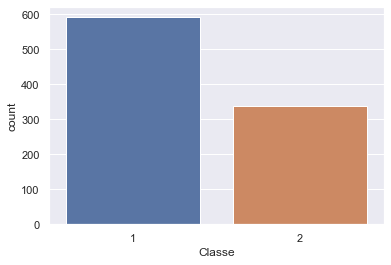

In [38]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Classe", data=datadocs)

In [21]:
# Create our list of punctuation marks
punctuations = string.punctuation
#stopWords = set(stopwords.words('french'))
stopWords = list(fr_stop)

In [23]:
def PretraitementTexte(X):
    texte=TransformationPdfImage(X,monRepertoireimg)
    #tokenisation(cleaning_round4(
    return tokenisation(cleaning_round3(cleaning_round2(cleaning_round1(texte))))

In [25]:
text_test=PretraitementTexte(r"F:\Sauv Surface 06092020\Données CV LM\CV LM\dataset\CVHanane.pdf")
text_test

F:\Sauv Surface 06092020\Données CV LM\CV LM\dataset
CVHanane.pdf

Hanane Chenaf Anir Profil

En Rcchcrchc d'/\ltcrnancc on Sciences Dos Données pour le master specialise
"Expert sciences des données "a l'lNSA dc Roucn. E><pc'ricncc avc'rc'c dc plus de 15

 

ans en conception ,developpement et management des applications web et solutions

ﬂ 57 avenue des pr°Vl”Ce5 Sl sur plusieu rs technologies .Net, PH P.
76120 Le grand quevilly
F rm i n
,2 0769706528 0 at O S
. Licence 3éme année en Sciences Des Données 09/2020 - 07/2021
& anirhanane@yahoo.fr _ _ _ _ _ _ , _
Universite Sciences et techniques de Rouen Normandie, Saint-Etienne du Rouvray
m httPSI//WWW-linkedln-C0m/in/hanane Développement PHP Symfony 12/2019 - 03/2020
am” Eni Ecole lnformatique, Rennes
1 permjs B Mastére Spécialisé en Conception, Réalisation, 10/2010 - 02/2012
Management SI
, Institut National de Sciences Appliquee de Lyon — INSA Lyon, Casablanca
Com petences
lngénieur d'état en lnformatique 09/2000 - 06/2003

PY’Eh0n 

'hanane chenaf anir profil rcchcrchc ltcrnancc sciences dos données master specialise expert sciences données a lnsa dc roucn e pc ricncc avc rc dc plus ans conception developpement management applications web solutions ﬂ avenue pr vl sl plusieu rs technologies net ph p grand quevilly f rm i at o licence année sciences données anirhanane yahoo fr universite sciences techniques rouen normandie saint etienne rouvray httpsi www linkedln in hanane développement php symfony am eni ecole lnformatique rennes permjs b mastére spécialisé conception réalisation management si institut national sciences appliquee lyon insa lyon casablanca com petences lngénieur état lnformatique py institut national statistique economie appliquée rabat machine learning o o ea projets académiques java o sql server o o php q q q q analyse visualisation données open data snce tableau python symfony q q q q flasl pycharm net q q q définir modele prédictif regularité lntercités tgv transilien python mysql o o o o estim

In [24]:
# Create our list of punctuation marks
punctuations = string.punctuation
#stopWords = set(stopwords.words('french'))
stopWords = list(fr_stop)

In [25]:
# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = nlp(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    #mytokens = [ word for word in mytokens if word not in stopWords and word not in punctuations ]


    # return preprocessed list of tokens
    return " ".join(mytokens)

In [26]:
vect= TfidfVectorizer(stop_words=stopWords, analyzer='word',min_df = 10)#, ngram_range=(1,2)

tfidf_mat=vect.fit_transform(datadocs.texte)
print(len(vect.get_feature_names()))
feature_names= vect.get_feature_names()#les noms des tokens
dense=tfidf_mat.todense()#convert sparse matrix to numpy array
denselist= dense.tolist()#convert array to list
df2=pd.DataFrame(dense.tolist(),columns=feature_names)
df2.head()

C:\Users\surfaC\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['neuf', 'qu', 'quelqu'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


1928


,abdellah,aboration,abou,absences,ac,academique,academy,académique,accepter,acces,...,événements,ﬁduciaire,ﬁn,ﬁnance,ﬁnancement,ﬁnancier,ﬁnanciere,ﬁnancieres,ﬁnanciers,ﬂux
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.138723,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.101270,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.089748,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.076052,0.000000,0.088448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=1000,
                                 min_df=0.2, stop_words=stopWords,
                                 use_idf=True,tokenizer = spacy_tokenizer,  ngram_range=(1,2))
with open('vecttfidf2', 'wb') as picklefile:  
        pickle.dump(tfidf_vectorizer,picklefile)

tfidf_matrix = tfidf_vectorizer.fit_transform(datadocs.texte) #fit the vectorizer to texte docs
print(tfidf_matrix)


C:\Users\surfaC\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens [' ', "'", '-', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'j', 'l', 'm', 'n', 'p', 'q', 'r', 's', 't', 'u', 'v', 'x', 'z', 'ç', 'è', 'é', 'ê', 'ù', '’'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


  (0, 184)	0.06713172577240853
  (0, 167)	0.1096167408574915
  (0, 100)	0.11337046890561436
  (0, 113)	0.054111070980578525
  (0, 187)	0.07286640793755135
  (0, 90)	0.07619004324445981
  (0, 30)	0.1200738071558974
  (0, 16)	0.06433480831682302
  (0, 119)	0.055442218756916864
  (0, 158)	0.0599006562139585
  (0, 116)	0.06843452788843463
  (0, 153)	0.06107249536178415
  (0, 152)	0.08043407601870729
  (0, 127)	0.05902523061491968
  (0, 157)	0.057133199689115156
  (0, 190)	0.08686154124368019
  (0, 58)	0.06300058865912662
  (0, 3)	0.07151573076938707
  (0, 97)	0.05771168414927972
  (0, 163)	0.1218659873526763
  (0, 160)	0.10295518722723536
  (0, 21)	0.10615945130091678
  (0, 77)	0.07360416840374333
  (0, 12)	0.06093299367633815
  (0, 41)	0.054711128202670024
  :	:
  (928, 86)	0.05176526893158449
  (928, 192)	0.04242236608414099
  (928, 45)	0.06696069332126975
  (928, 143)	0.08591447928681575
  (928, 39)	0.04551213144656883
  (928, 137)	0.08087309500021077
  (928, 35)	0.13819702692440092
  (

In [28]:
bow_vector = CountVectorizer(ngram_range=(1,1),stop_words=stopWords)
bow_vector
with open('bowvector', 'wb') as picklefile:  
        pickle.dump(bow_vector,picklefile)
vectdocs = bow_vector.fit_transform(datadocs["texte"])
#vectdocs = bow_vector.fit(datadocs["texte"])
print(len(bow_vector.get_feature_names()))
#print ("Taille: {}",  len (vectdocs.vocabulary_))
#print ("Contenu: {}",  vectdocs.vocabulary_)

C:\Users\surfaC\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['neuf', 'qu', 'quelqu'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


19656


In [29]:
X = datadocs['texte'] # the features we want to analyze
ylabels = datadocs['Classe'] # the classe
ylabels=ylabels.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3)



In [49]:
CV_text = [text for text in datadocs[datadocs['Classe'] == 1]['texte']]

LM_text = [text for text in datadocs[datadocs['Classe'] == 2]['texte']]
CV_text
LM_text
CV_text = ' '.join(CV_text).split()

LM_text = ' '.join(LM_text).split()

CV_counts = Counter(CV_text)
LM_counts = Counter(LM_text)

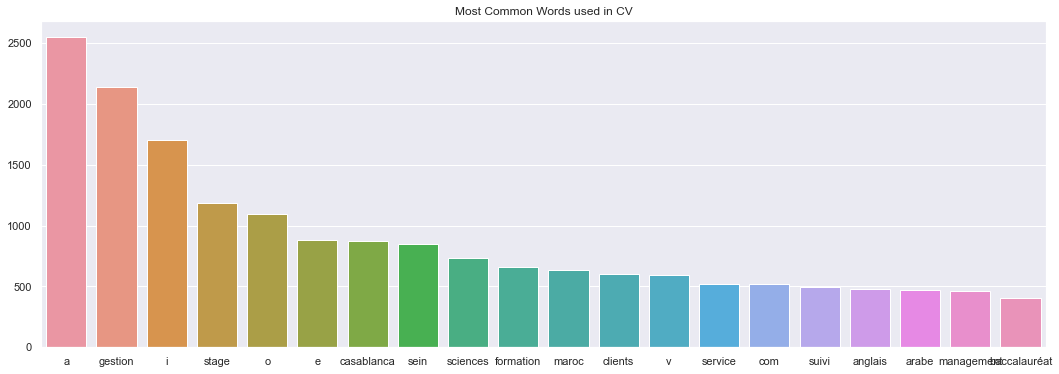

In [50]:
CV_common_words = [word[0] for word in CV_counts.most_common(20)]
CV_common_counts = [word[1] for word in CV_counts.most_common(20)]

fig = plt.figure(figsize=(18,6))
sns.barplot(x=CV_common_words, y=CV_common_counts)
plt.title('Most Common Words used in CV')
plt.show()

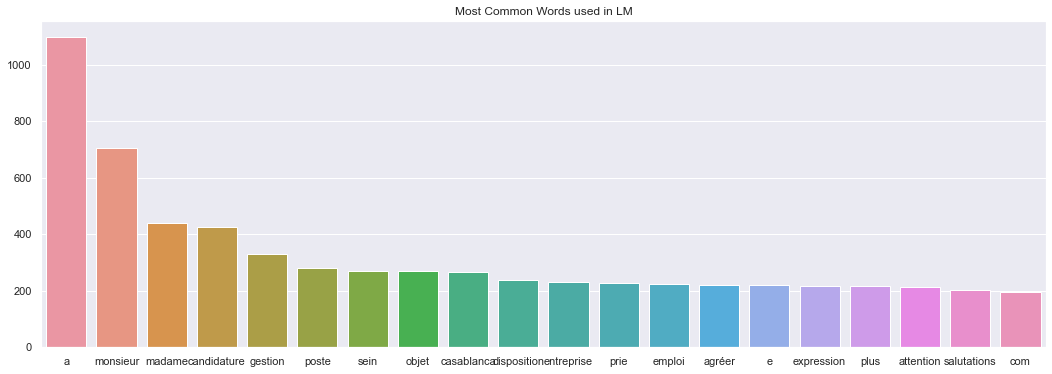

In [51]:
LM_common_words = [word[0] for word in LM_counts.most_common(20)]
LM_common_counts = [word[1] for word in LM_counts.most_common(20)]

fig = plt.figure(figsize=(18,6))
sns.barplot(x=LM_common_words, y=LM_common_counts)
plt.title('Most Common Words used in LM')
plt.show()

In [30]:
# Custom transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

In [55]:
#,'SGD Classifier',SGDClassifier(max_iter=100)
#Define models to train
names=['K Nearest Neighbors','Decision Tree', 'Random_Forest', 'Logistic_regression', 'Naive Bayes','SVM Linear']
classifiers=[KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),LogisticRegression(),MultinomialNB(),SVC(kernel='linear')]
models=zip(names,classifiers)
X_validationLM=PretraitementTexte(r"F:\Sauv Surface 06092020\Données CV LM\CV LM\dataset\Lettre Motivation Stage Licence-GRDF.pdf")
X_validationCV=PretraitementTexte(r"F:\Sauv Surface 06092020\Données CV LM\CV LM\dataset\test_hors.pdf")
for name, model in models:
    # Create pipeline using Bag of Words
    pipe = Pipeline([("cleaner", predictors()),
                     ('vectorizer', bow_vector),
                     ('classifier', model)])

    # model generation
    pipe.fit(X_train,y_train)
    # Let's pickle it for later use
    joblib.dump(pipe,name+'.pkl')
    # Predicting with a test dataset
    print("Predicting with a test dataset")
    predicted = pipe.predict(X_test)
    #print(predicted)
    #print(y_test)
    print('{}:Accuracy: {}'.format(name,metrics.accuracy_score(y_test, predicted)))
    print('{}:Precision micro: {}'.format(name,metrics.precision_score(y_test, predicted, average='micro')))
    print('{}:Recall micro: {}'.format(name,metrics.recall_score(y_test, predicted, average='micro')))
    print('{}:Precision N: {}'.format(name,metrics.precision_score(y_test, predicted, average=None)))
    print('{}:Recall N: {}'.format(name,metrics.recall_score(y_test, predicted, average=None)))
    print(" Confusion matrix: {}".format(confusion_matrix(predicted, y_test)))
    # Predicting with a validation dataset CV
    print('Predicting with a validation dataset CV')
    predictedcv = pipe.predict(np.array([X_validationCV]))
    y_validationcv=np.array([1])
    print(" Value Predicted: {}".format(predictedcv))
    print("proba: {}".format(pipe.predict_proba(np.array([X_validationCV]))))
    #print(y_validation)
    # Model Accuracy
    print('{}:Accuracy: {}'.format(name,metrics.accuracy_score(y_validationcv, predictedcv)))
    print('{}:Precision micro: {}'.format(name,metrics.precision_score(y_validationcv, predictedcv, average='micro')))
    print('{}:Recall micro: {}'.format(name,metrics.recall_score(y_validationcv, predictedcv, average='micro')))
    print('{}:Precision N: {}'.format(name,metrics.precision_score(y_validationcv, predictedcv, average=None)))
    print('{}:Recall N: {}'.format(name,metrics.recall_score(y_validationcv, predictedcv, average=None)))
    # Predicting with a validation dataset LM
    print("Predicting with a validation dataset LM")
    predictedlm = pipe.predict(np.array([X_validationLM]))
    y_validationlm=np.array([2])
    print(" Value Predicted: {}".format(predictedlm))
    print("proba: {}".format(pipe.predict_proba(np.array([X_validationLM]))))
    #print(y_validation)
    # Model Accuracy
    print('{}:Accuracy: {}'.format(name,metrics.accuracy_score(y_validationlm, predictedlm)))
    print('{}:Precision micro: {}'.format(name,metrics.precision_score(y_validationlm, predictedlm, average='micro')))
    print('{}:Recall micro: {}'.format(name,metrics.recall_score(y_validationlm, predictedlm, average='micro')))
    print('{}:Precision N: {}'.format(name,metrics.precision_score(y_validationlm, predictedlm, average=None)))
    print('{}:Recall N: {}'.format(name,metrics.recall_score(y_validationlm, predictedlm, average=None)))

F:\Sauv Surface 06092020\Données CV LM\CV LM\dataset
Lettre Motivation Stage Licence-GRDF.pdf

Hanane Chenaf Anir

57 avenue des provinces

76120 Le Grand Quevilly A Le Grand Quevilly, le 10 fevrier 2021

anirhanane@yahoo.fr

0769706528
A l’attention de Monsieur le directeur de
GRDF

Objet : candidature au poste Stagiaire en Sciences de Données

Monsieur,

Dans le cadre de la licence 3 annee en Sciences des donnees, je suis actuellement a la recherche d’un
stage oriente Sciences des donnees d’une duree minimum de 2 mois a compter d’avril 2021.

Titulaire d’un diplome d‘ingenieur en informatique, adosse a un mastere specialise en conception,
realisation et management des systemes d’Information, je me permets de vous adresser mon dossier de
candidature pour le poste Stagiaire en Sciences de Donnees.

Au cours de mes etudes, j ’ai eu l’occasion de beneficier d’un cursus fonde sur l’etude, la conception,
la realisation des Systemes d’information ainsi que sur les statistiques, probabilite,

Predicting with a test dataset
K Nearest Neighbors:Accuracy: 0.9390681003584229
K Nearest Neighbors:Precision micro: 0.9390681003584229
K Nearest Neighbors:Recall micro: 0.9390681003584229
K Nearest Neighbors:Precision N: [1.         0.84821429]
K Nearest Neighbors:Recall N: [0.9076087 1.       ]
 Confusion matrix: [[167   0]
 [ 17  95]]
Predicting with a validation dataset CV
 Value Predicted: [1]
proba: [[1. 0.]]
K Nearest Neighbors:Accuracy: 1.0
K Nearest Neighbors:Precision micro: 1.0
K Nearest Neighbors:Recall micro: 1.0
K Nearest Neighbors:Precision N: [1.]
K Nearest Neighbors:Recall N: [1.]
Predicting with a validation dataset LM
 Value Predicted: [2]
proba: [[0.2 0.8]]
K Nearest Neighbors:Accuracy: 1.0
K Nearest Neighbors:Precision micro: 1.0
K Nearest Neighbors:Recall micro: 1.0
K Nearest Neighbors:Precision N: [1.]
K Nearest Neighbors:Recall N: [1.]
Predicting with a test dataset
Decision Tree:Accuracy: 0.978494623655914
Decision Tree:Precision micro: 0.978494623655914
Decisi

AttributeError: predict_proba is not available when  probability=False

In [34]:
#,'SGD Classifier',SGDClassifier(max_iter=100)
#Define models to train
names=['Random_Forest']
classifiers=[RandomForestClassifier()]
models=zip(names,classifiers)
X_validationLM=PretraitementTexte(r"F:\Sauv Surface 06092020\Données CV LM\CV LM\dataset\Lettre Motivation Stage Licence-GRDF.pdf")
X_validationCV=PretraitementTexte(r"F:\Sauv Surface 06092020\Données CV LM\CV LM\dataset\test_hors.pdf")
for name, model in models:
    # Create pipeline using Bag of Words
    pipe = Pipeline([("cleaner", predictors()),
                     ('vectorizer', vect),
                     ('classifier', model)])

    # model generation
    pipe.fit(X_train,y_train)
    # Let's pickle it for later use
    joblib.dump(pipe,name+'2.pkl')
    # Predicting with a test dataset
    print("Predicting with a test dataset")
    predicted = pipe.predict(X_test)
    #X_test.to_pickle("X_test.pkl")
    #y_test.to_pickle("y_test.pkl")
    #print(predicted)
    #print(y_test)
    print('{}:Accuracy: {}'.format(name,metrics.accuracy_score(y_test, predicted)))
    print('{}:Precision micro: {}'.format(name,metrics.precision_score(y_test, predicted, average='micro')))
    print('{}:Recall micro: {}'.format(name,metrics.recall_score(y_test, predicted, average='micro')))
    print('{}:Precision N: {}'.format(name,metrics.precision_score(y_test, predicted, average=None)))
    print('{}:Recall N: {}'.format(name,metrics.recall_score(y_test, predicted, average=None)))
    print(" Confusion matrix: {}".format(confusion_matrix(predicted, y_test)))
    # Predicting with a validation dataset CV
    print('Predicting with a validation dataset CV')
    predictedcv = pipe.predict(np.array([X_validationCV]))
    y_validationcv=np.array([1])
    print(" Value Predicted: {}".format(predictedcv))
    print("proba: {}".format(pipe.predict_proba(np.array([X_validationCV]))))
    #print(y_validation)
    # Model Accuracy
    print('{}:Accuracy: {}'.format(name,metrics.accuracy_score(y_validationcv, predictedcv)))
    print('{}:Precision micro: {}'.format(name,metrics.precision_score(y_validationcv, predictedcv, average='micro')))
    print('{}:Recall micro: {}'.format(name,metrics.recall_score(y_validationcv, predictedcv, average='micro')))
    print('{}:Precision N: {}'.format(name,metrics.precision_score(y_validationcv, predictedcv, average=None)))
    print('{}:Recall N: {}'.format(name,metrics.recall_score(y_validationcv, predictedcv, average=None)))
    # Predicting with a validation dataset LM
    print("Predicting with a validation dataset LM")
    predictedlm = pipe.predict(np.array([X_validationLM]))
    y_validationlm=np.array([2])
    print(" Value Predicted: {}".format(predictedlm))
    print("proba: {}".format(pipe.predict_proba(np.array([X_validationLM]))))
    #print(y_validation)
    # Model Accuracy
    print('{}:Accuracy: {}'.format(name,metrics.accuracy_score(y_validationlm, predictedlm)))
    print('{}:Precision micro: {}'.format(name,metrics.precision_score(y_validationlm, predictedlm, average='micro')))
    print('{}:Recall micro: {}'.format(name,metrics.recall_score(y_validationlm, predictedlm, average='micro')))
    print('{}:Precision N: {}'.format(name,metrics.precision_score(y_validationlm, predictedlm, average=None)))
    print('{}:Recall N: {}'.format(name,metrics.recall_score(y_validationlm, predictedlm, average=None)))

F:\Sauv Surface 06092020\Données CV LM\CV LM\dataset
Lettre Motivation Stage Licence-GRDF.pdf

Hanane Chenaf Anir

57 avenue des provinces

76120 Le Grand Quevilly A Le Grand Quevilly, le 10 fevrier 2021

anirhanane@yahoo.fr

0769706528
A l’attention de Monsieur le directeur de
GRDF

Objet : candidature au poste Stagiaire en Sciences de Données

Monsieur,

Dans le cadre de la licence 3 annee en Sciences des donnees, je suis actuellement a la recherche d’un
stage oriente Sciences des donnees d’une duree minimum de 2 mois a compter d’avril 2021.

Titulaire d’un diplome d‘ingenieur en informatique, adosse a un mastere specialise en conception,
realisation et management des systemes d’Information, je me permets de vous adresser mon dossier de
candidature pour le poste Stagiaire en Sciences de Donnees.

Au cours de mes etudes, j ’ai eu l’occasion de beneficier d’un cursus fonde sur l’etude, la conception,
la realisation des Systemes d’information ainsi que sur les statistiques, probabilite,

Predicting with a test dataset
Random_Forest:Accuracy: 0.992831541218638
Random_Forest:Precision micro: 0.992831541218638
Random_Forest:Recall micro: 0.992831541218638
Random_Forest:Precision N: [1.         0.97777778]
Random_Forest:Recall N: [0.9895288 1.       ]
 Confusion matrix: [[189   0]
 [  2  88]]
Predicting with a validation dataset CV
 Value Predicted: [1]
proba: [[0.66685714 0.33314286]]
Random_Forest:Accuracy: 1.0
Random_Forest:Precision micro: 1.0
Random_Forest:Recall micro: 1.0
Random_Forest:Precision N: [1.]
Random_Forest:Recall N: [1.]
Predicting with a validation dataset LM
 Value Predicted: [2]
proba: [[0.13 0.87]]
Random_Forest:Accuracy: 1.0
Random_Forest:Precision micro: 1.0
Random_Forest:Recall micro: 1.0
Random_Forest:Precision N: [1.]
Random_Forest:Recall N: [1.]


In [ ]:
def printNMostInformative(vectorizer, clf, N):
    feature_names = vectorizer.get_feature_names()
    print(feature_names)
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    topClass1 = coefs_with_fns[:N]
    topClass2 = coefs_with_fns[:-(N + 1):-1]
    print("Class 1 best: ")
    for feat in topClass1:
        print(feat)
    print("Class 2 best: ")
    for feat in topClass2:
        print(feat)

In [ ]:
printNMostInformative(bow_vector, classifier, 10)

In [ ]:
printNMostInformative(vect, classifier, 10)

In [ ]:
#sauvegarder le modèle
with open('text_classifier', 'wb') as picklefile:  
    pickle.dump(classifier,picklefile)

In [ ]:
#charger le modèle
with open('text_classifier', 'rb') as training_model:  
    model = pickle.load(training_model)  